In [45]:
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
import re

from os import listdir
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
np.random.seed(13)
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from stockstats import StockDataFrame 
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data

import dataPreparation
files=['AAPL','AMZN','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       
indexesFiles=listdir("/home/andrea/Desktop/stocknet-dataset-master/price/raw")

tickers=list()
for file in indexesFiles:
    file=re.sub('\.csv$', '', file)
    
    tickers.append(file)
tickers.sort()

prices=list()
sentiment=list()
for file in tickers:
    
    price =  pd.read_csv("/home/andrea/Desktop/stocknet-dataset-master/price/raw/"+file+".csv")
    
    print(price)
    price=price.drop(['Date'],axis=1)
    prices.append(price)

            Date        Open        High         Low       Close   Adj Close  \
0     2012-09-04   95.108574   96.448570   94.928574   96.424286   87.121140   
1     2012-09-05   96.510002   96.621429   95.657143   95.747147   86.509338   
2     2012-09-06   96.167145   96.898575   95.828575   96.610001   87.288956   
3     2012-09-07   96.864288   97.497147   96.538574   97.205711   87.827171   
4     2012-09-10   97.207146   97.612854   94.585716   94.677139   85.542564   
5     2012-09-11   95.015717   95.728569   93.785713   94.370003   85.265068   
6     2012-09-12   95.264282   95.699997   93.714287   95.684288   86.452538   
7     2012-09-13   96.767143   97.928574   96.395714   97.568573   88.155037   
8     2012-09-14   98.565712   99.568573   98.269997   98.754288   89.226341   
9     2012-09-17   99.907143   99.971428   99.230003   99.968575   90.323479   
10    2012-09-18   99.982857  100.332855   99.488571  100.272858   90.598404   
11    2012-09-19  100.037140  100.570000

            Date       Open       High        Low      Close  Adj Close  \
0     2012-09-04  52.560001  52.680000  52.360001  52.400002  42.492722   
1     2012-09-05  52.320000  52.590000  52.139999  52.259998  42.379185   
2     2012-09-06  52.570000  52.970001  52.470001  52.930000  42.922512   
3     2012-09-07  53.040001  53.270000  52.849998  53.189999  43.133358   
4     2012-09-10  52.740002  52.740002  52.270000  52.360001  42.460285   
5     2012-09-11  52.820000  53.029999  52.790001  52.950001  42.938728   
6     2012-09-12  53.330002  53.349998  52.939999  53.040001  43.011707   
7     2012-09-13  52.790001  53.680000  52.570000  53.340000  43.254993   
8     2012-09-14  53.910000  54.090000  53.520000  53.799999  43.628021   
9     2012-09-17  53.270000  53.450001  53.099998  53.369999  43.279320   
10    2012-09-18  53.669998  53.880001  53.650002  53.740002  43.579365   
11    2012-09-19  54.750000  55.049999  54.740002  55.000000  44.601135   
12    2012-09-20  54.5800

            Date       Open       High        Low      Close  Adj Close  \
0     2012-09-04   8.390000   9.240000   8.390000   9.120000   8.885954   
1     2012-09-05   9.150000   9.200000   8.810000   8.960000   8.730060   
2     2012-09-06   9.010000   9.060000   8.820000   8.880000   8.652113   
3     2012-09-07   8.940000   8.970000   8.620000   8.650000   8.428015   
4     2012-09-10   8.500000   8.590000   8.150000   8.160000   7.950590   
5     2012-09-11   8.200000   8.510000   8.100000   8.280000   8.067511   
6     2012-09-12   8.290000   8.410000   7.960000   8.050000   7.843413   
7     2012-09-13   8.030000   8.190000   7.930000   8.130000   7.921360   
8     2012-09-14   8.130000   8.210000   7.950000   8.050000   7.843413   
9     2012-09-17   7.980000   8.110000   7.950000   8.110000   7.901873   
10    2012-09-18   8.100000   8.760000   7.840000   8.660000   8.437758   
11    2012-09-19   8.670000   8.820000   8.630000   8.710000   8.486476   
12    2012-09-20   8.6500

            Date         Open         High          Low        Close  \
0     2012-09-04   604.250000   606.489990   595.000000   596.890015   
1     2012-09-05   597.500000   601.719971   594.450012   595.179993   
2     2012-09-06   599.570007   609.239990   597.260010   604.000000   
3     2012-09-07   612.500000   622.890015   612.109985   621.549988   
4     2012-09-10   620.969971   624.500000   607.460022   608.320007   
5     2012-09-11   608.599976   621.250000   606.109985   617.760010   
6     2012-09-12   620.000000   628.489990   615.950012   619.950012   
7     2012-09-13   619.950012   629.780029   617.679993   626.929993   
8     2012-09-14   628.150024   645.059998   627.840027   637.479980   
9     2012-09-17   636.849976   646.080017   634.609985   643.349976   
10    2012-09-18   640.349976   649.299988   638.049988   640.729980   
11    2012-09-19   641.010010   644.169983   636.549988   639.030029   
12    2012-09-20   635.690002   635.890015   629.580017   633.77

            Date       Open       High        Low      Close  Adj Close  \
0     2012-09-04  36.049999  36.080002  35.860001  35.980000  30.574104   
1     2012-09-05  36.270000  36.270000  35.959999  36.009998  30.599602   
2     2012-09-06  36.299999  36.820000  36.299999  36.779999  31.253912   
3     2012-09-07  36.439999  36.599998  36.340000  36.380001  30.914015   
4     2012-09-10  35.759998  35.980000  35.759998  35.830002  30.446650   
5     2012-09-11  36.040001  36.290001  35.959999  36.169998  30.735558   
6     2012-09-12  36.270000  36.270000  35.930000  36.020000  30.608101   
7     2012-09-13  36.020000  36.529999  35.930000  36.480000  30.998993   
8     2012-09-14  36.230000  36.639999  36.230000  36.549999  31.058468   
9     2012-09-17  36.869999  36.959999  36.680000  36.750000  31.228422   
10    2012-09-18  37.090000  37.200001  36.990002  37.090000  31.517323   
11    2012-09-19  37.259998  37.389999  37.130001  37.290001  31.687284   
12    2012-09-20  37.0999

In [46]:
def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=0
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt,u
                    

Working on... AAPL
0.046415888336127774
Window: 0
[[  0 110]
 [  0 141]]
F1,score 0.7193877551020408
Accuracy: 0.5617529880478087
0.000774263682681127
Window: 2
[[ 97   0]
 [154   0]]
F1,score 0.0
Accuracy: 0.38645418326693226


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


11.787686347935873
Window: 5
[[ 82   2]
 [164   2]]
F1,score 0.023529411764705882
Accuracy: 0.336
1.0
Window: 7
[[ 80   0]
 [170   0]]
F1,score 0.0
Accuracy: 0.32


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


1.0
Window: 10
[[ 67   0]
 [182   0]]
F1,score 0.0
Accuracy: 0.26907630522088355
[0, 0, 0, 0, 0]
[0.5617529880478087, 0.38645418326693226, 0.336, 0.32, 0.26907630522088355]
accuracy
accuracy


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


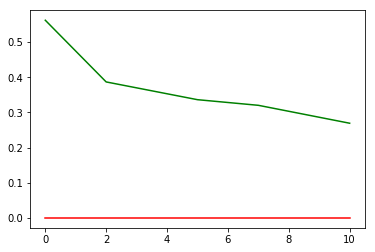

Working on... ABB
2.6826957952797255
Window: 0
[[  2 104]
 [ 11 134]]
F1,score 0.6997389033942559
Accuracy: 0.5418326693227091
11.787686347935873
Window: 2
[[105  10]
 [118  18]]
F1,score 0.21951219512195122
Accuracy: 0.4900398406374502
19.306977288832496
Window: 5
[[112   2]
 [126  10]]
F1,score 0.13513513513513514
Accuracy: 0.488
2.782559402207126
Window: 7
[[105   8]
 [112  25]]
F1,score 0.29411764705882354
Accuracy: 0.52
21.54434690031882
Window: 10
[[108   0]
 [141   0]]
F1,score 0.0
Accuracy: 0.43373493975903615
[0, 0, 0, 0, 0]
[0.5418326693227091, 0.4900398406374502, 0.488, 0.52, 0.43373493975903615]
accuracy
accuracy


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


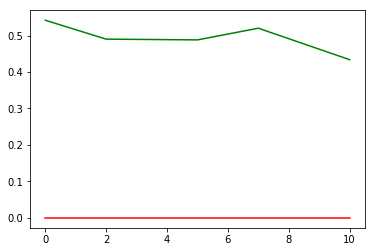

Working on... ABBV
1000.0
Window: 0
[[104   2]
 [124   5]]
F1,score 0.07352941176470588
Accuracy: 0.46382978723404256
31.622776601683793
Window: 2
[[ 96   5]
 [125   8]]
F1,score 0.1095890410958904
Accuracy: 0.4444444444444444
1000.0
Window: 5
[[  0 105]
 [  0 129]]
F1,score 0.7107438016528926
Accuracy: 0.5512820512820513
610.5402296585327
Window: 7
[[34 78]
 [34 87]]
F1,score 0.6083916083916083
Accuracy: 0.51931330472103
10000.0
Window: 10
[[80 26]
 [73 54]]
F1,score 0.5217391304347827
Accuracy: 0.575107296137339
[0, 0, 0, 0, 0]
[0.46382978723404256, 0.4444444444444444, 0.5512820512820513, 0.51931330472103, 0.575107296137339]
accuracy
accuracy


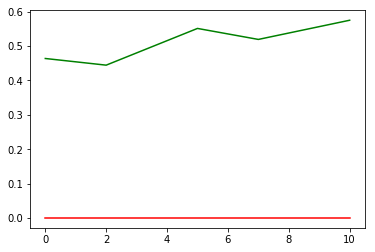

Working on... AEP
227.58459260747887
Window: 0
[[36 68]
 [53 94]]
F1,score 0.6084142394822006
Accuracy: 0.5179282868525896
138.94954943731375
Window: 2
[[ 22  78]
 [ 27 124]]
F1,score 0.7025495750708216
Accuracy: 0.5816733067729084
10000.0
Window: 5
[[ 28  72]
 [ 31 119]]
F1,score 0.6979472140762463
Accuracy: 0.588
1291.5496650148827
Window: 7
[[ 28  65]
 [ 24 133]]
F1,score 0.7492957746478873
Accuracy: 0.644
372.7593720314938
Window: 10
[[ 29  57]
 [ 35 128]]
F1,score 0.7356321839080461
Accuracy: 0.6305220883534136
[0, 0, 0, 0, 0]
[0.5179282868525896, 0.5816733067729084, 0.588, 0.644, 0.6305220883534136]
accuracy
accuracy


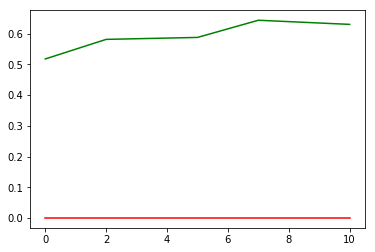

Working on... AGFS
227.58459260747887
Window: 0
[[52  9]
 [70  9]]
F1,score 0.18556701030927836
Accuracy: 0.4357142857142857
10000.0
Window: 2
[[51  5]
 [76  7]]
F1,score 0.14736842105263157
Accuracy: 0.4172661870503597
138.94954943731375
Window: 5
[[32 15]
 [65 27]]
F1,score 0.40298507462686567
Accuracy: 0.4244604316546763
11.787686347935873
Window: 7
[[37  8]
 [88  5]]
F1,score 0.09433962264150943
Accuracy: 0.30434782608695654
10000.0
Window: 10
[[41  1]
 [85 11]]
F1,score 0.2037037037037037
Accuracy: 0.37681159420289856
[0, 0, 0, 0, 0]
[0.4357142857142857, 0.4172661870503597, 0.4244604316546763, 0.30434782608695654, 0.37681159420289856]
accuracy
accuracy


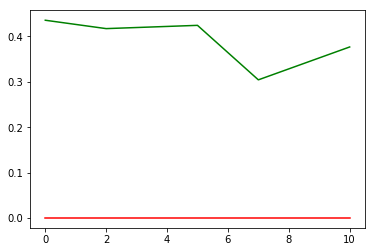

Working on... AMGN
10000.0
Window: 0
[[36 82]
 [52 81]]
F1,score 0.5472972972972973
Accuracy: 0.46613545816733065
84.83428982440716
Window: 2
[[82 37]
 [92 40]]
F1,score 0.3827751196172249
Accuracy: 0.4860557768924303
10000.0
Window: 5
[[50 76]
 [47 77]]
F1,score 0.5559566787003609
Accuracy: 0.508
1291.5496650148827
Window: 7
[[58 74]
 [35 83]]
F1,score 0.6036363636363636
Accuracy: 0.564
372.7593720314938
Window: 10
[[89 36]
 [56 68]]
F1,score 0.5964912280701755
Accuracy: 0.6305220883534136
[0, 0, 0, 0, 0]
[0.46613545816733065, 0.4860557768924303, 0.508, 0.564, 0.6305220883534136]
accuracy
accuracy


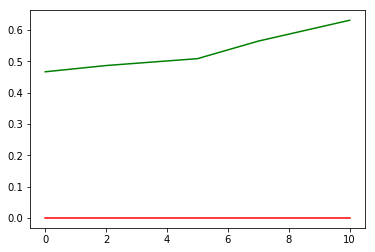

Working on... AMZN
0.3593813663804626
Window: 0
[[127   0]
 [124   0]]
F1,score 0.0
Accuracy: 0.5059760956175299


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


2.6826957952797255
Window: 2
[[107   0]
 [144   0]]
F1,score 0.0
Accuracy: 0.4262948207171315


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


1.0
Window: 5
[[  0 106]
 [  0 144]]
F1,score 0.730964467005076
Accuracy: 0.576
10000.0
Window: 7
[[103   0]
 [147   0]]
F1,score 0.0
Accuracy: 0.412


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


2.6826957952797255
Window: 10
[[  0  99]
 [  0 150]]
F1,score 0.7518796992481204
Accuracy: 0.6024096385542169
[0, 0, 0, 0, 0]
[0.5059760956175299, 0.4262948207171315, 0.576, 0.412, 0.6024096385542169]
accuracy
accuracy


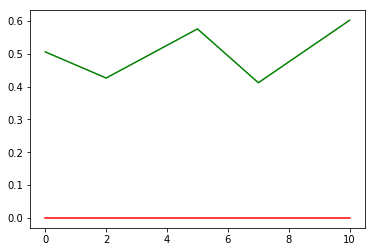

Working on... BA
1000.0
Window: 0
[[ 97  20]
 [107  27]]
F1,score 0.2983425414364641
Accuracy: 0.4940239043824701
31.622776601683793
Window: 2
[[ 85   3]
 [160   3]]
F1,score 0.03550295857988166
Accuracy: 0.350597609561753
31.622776601683793
Window: 5
[[ 75   1]
 [170   4]]
F1,score 0.0446927374301676
Accuracy: 0.316
166.81005372000558
Window: 7
[[ 60   1]
 [187   2]]
F1,score 0.020833333333333332
Accuracy: 0.248
84.83428982440716
Window: 10
[[ 52   0]
 [197   0]]
F1,score 0.0
Accuracy: 0.20883534136546184
[0, 0, 0, 0, 0]
[0.4940239043824701, 0.350597609561753, 0.316, 0.248, 0.20883534136546184]
accuracy
accuracy


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


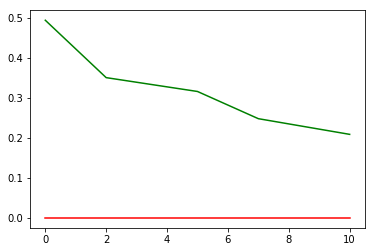

Working on... BABA
1291.5496650148827
Window: 0
[[75  3]
 [69  1]]
F1,score 0.027027027027027025
Accuracy: 0.5135135135135135
1.0
Window: 2
[[57  0]
 [91  0]]
F1,score 0.0
Accuracy: 0.38513513513513514


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.000774263682681127
Window: 5
[[ 40   0]
 [107   0]]
F1,score 0.0
Accuracy: 0.272108843537415


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.005994842503189409
Window: 7
[[ 26   0]
 [121   0]]
F1,score 0.0
Accuracy: 0.17687074829931973


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0001
Window: 10
[[ 17   0]
 [129   0]]
F1,score 0.0
Accuracy: 0.11643835616438356
[0, 0, 0, 0, 0]
[0.5135135135135135, 0.38513513513513514, 0.272108843537415, 0.17687074829931973, 0.11643835616438356]
accuracy
accuracy


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


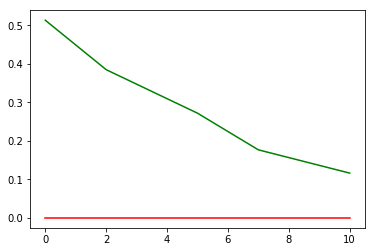

Working on... BAC
21.54434690031882
Window: 0
[[123   4]
 [120   4]]
F1,score 0.06060606060606061
Accuracy: 0.5059760956175299
7.196856730011519
Window: 2
[[120   0]
 [131   0]]
F1,score 0.0
Accuracy: 0.47808764940239046


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


19.306977288832496
Window: 5
[[109   4]
 [132   5]]
F1,score 0.0684931506849315
Accuracy: 0.456
138.94954943731375
Window: 7
[[102   6]
 [134   8]]
F1,score 0.10256410256410255
Accuracy: 0.44
1.637893706954064
Window: 10
[[102   0]
 [147   0]]
F1,score 0.0
Accuracy: 0.40963855421686746
[0, 0, 0, 0, 0]
[0.5059760956175299, 0.47808764940239046, 0.456, 0.44, 0.40963855421686746]
accuracy
accuracy


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


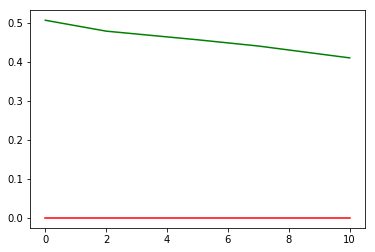

Working on... BBL
1.0
Window: 0
[[ 14 102]
 [ 19 116]]
F1,score 0.6572237960339944
Accuracy: 0.5179282868525896
84.83428982440716
Window: 2
[[ 95   9]
 [119  28]]
F1,score 0.3043478260869565
Accuracy: 0.4900398406374502
84.83428982440716
Window: 5
[[107   0]
 [139   4]]
F1,score 0.054421768707483
Accuracy: 0.444
227.58459260747887
Window: 7
[[110   2]
 [135   3]]
F1,score 0.04195804195804196
Accuracy: 0.452
372.7593720314938
Window: 10
[[118   0]
 [131   0]]
F1,score 0.0
Accuracy: 0.4738955823293173
[0, 0, 0, 0, 0]
[0.5179282868525896, 0.4900398406374502, 0.444, 0.452, 0.4738955823293173]
accuracy
accuracy


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


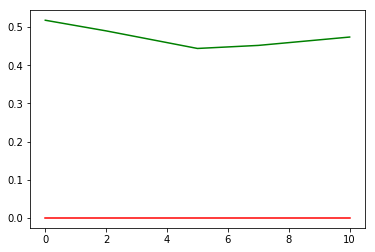

Working on... BCH
1291.5496650148827
Window: 0
[[123   0]
 [128   0]]
F1,score 0.0
Accuracy: 0.4900398406374502


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


11.787686347935873
Window: 2
[[ 92  11]
 [128  20]]
F1,score 0.22346368715083798
Accuracy: 0.44621513944223107
7.196856730011519
Window: 5
[[ 97   1]
 [149   3]]
F1,score 0.03846153846153846
Accuracy: 0.4
11.787686347935873
Window: 7
[[ 93   3]
 [139  15]]
F1,score 0.17441860465116282
Accuracy: 0.432
10000.0
Window: 10
[[ 84   0]
 [160   5]]
F1,score 0.05882352941176471
Accuracy: 0.357429718875502
[0, 0, 0, 0, 0]
[0.4900398406374502, 0.44621513944223107, 0.4, 0.432, 0.357429718875502]
accuracy
accuracy


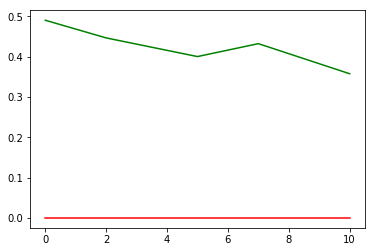

Working on... BHP
10000.0
Window: 0
[[ 86  25]
 [103  37]]
F1,score 0.36633663366336633
Accuracy: 0.4900398406374502
21.54434690031882
Window: 2
[[106   0]
 [137   8]]
F1,score 0.1045751633986928
Accuracy: 0.4541832669322709
610.5402296585327
Window: 5
[[104   0]
 [144   2]]
F1,score 0.027027027027027025
Accuracy: 0.424
227.58459260747887
Window: 7
[[109   1]
 [140   0]]
F1,score 0.0
Accuracy: 0.436
10000.0
Window: 10
[[112   0]
 [136   1]]
F1,score 0.014492753623188404
Accuracy: 0.4538152610441767
[0, 0, 0, 0, 0]
[0.4900398406374502, 0.4541832669322709, 0.424, 0.436, 0.4538152610441767]
accuracy
accuracy


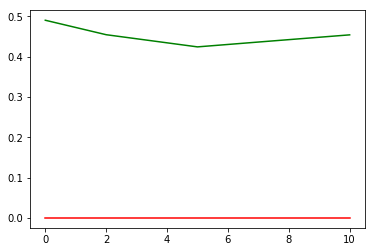

Working on... BP
0.046415888336127774
Window: 0
[[  0 141]
 [  0 110]]
F1,score 0.6094182825484764
Accuracy: 0.43824701195219123
227.58459260747887
Window: 2
[[133   0]
 [118   0]]
F1,score 0.0
Accuracy: 0.5298804780876494


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


10000.0
Window: 5
[[122   1]
 [126   1]]
F1,score 0.015503875968992248
Accuracy: 0.492
166.81005372000558
Window: 7
[[126   0]
 [124   0]]
F1,score 0.0
Accuracy: 0.504


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


31.622776601683793
Window: 10
[[124   0]
 [125   0]]
F1,score 0.0
Accuracy: 0.4979919678714859
[0, 0, 0, 0, 0]
[0.43824701195219123, 0.5298804780876494, 0.492, 0.504, 0.4979919678714859]
accuracy
accuracy


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


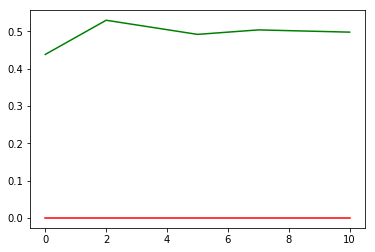

Working on... BRK-A
31.622776601683793
Window: 0
[[126   0]
 [125   0]]
F1,score 0.0
Accuracy: 0.50199203187251


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


227.58459260747887
Window: 2
[[124   0]
 [127   0]]
F1,score 0.0
Accuracy: 0.4940239043824701


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


138.94954943731375
Window: 5
[[116   0]
 [134   0]]
F1,score 0.0
Accuracy: 0.464


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


372.7593720314938
Window: 7
[[118   0]
 [132   0]]
F1,score 0.0
Accuracy: 0.472


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


19.306977288832496
Window: 10
[[ 99   0]
 [150   0]]
F1,score 0.0
Accuracy: 0.39759036144578314
[0, 0, 0, 0, 0]
[0.50199203187251, 0.4940239043824701, 0.464, 0.472, 0.39759036144578314]
accuracy
accuracy


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


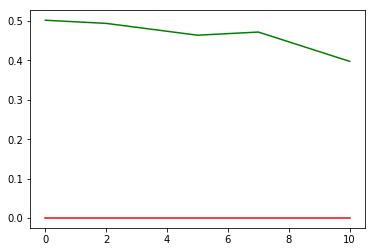

Working on... BSAC
372.7593720314938
Window: 0
[[83 35]
 [90 43]]
F1,score 0.40758293838862564
Accuracy: 0.50199203187251
7.196856730011519
Window: 2
[[103  13]
 [122  13]]
F1,score 0.16149068322981366
Accuracy: 0.46215139442231074
227.58459260747887
Window: 5
[[101   0]
 [149   0]]
F1,score 0.0
Accuracy: 0.404


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


4.39397056076079
Window: 7
[[ 79  16]
 [138  17]]
F1,score 0.18085106382978727
Accuracy: 0.384
227.58459260747887
Window: 10
[[ 93   1]
 [155   0]]
F1,score 0.0
Accuracy: 0.37349397590361444
[0, 0, 0, 0, 0]
[0.50199203187251, 0.46215139442231074, 0.404, 0.384, 0.37349397590361444]
accuracy
accuracy


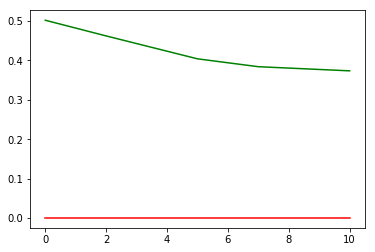

Working on... BUD
1000.0
Window: 0
[[ 21 108]
 [ 17 105]]
F1,score 0.626865671641791
Accuracy: 0.50199203187251
372.7593720314938
Window: 2
[[ 21  99]
 [ 14 117]]
F1,score 0.6743515850144093
Accuracy: 0.549800796812749
372.7593720314938
Window: 5
[[ 25 103]
 [ 14 108]]
F1,score 0.6486486486486486
Accuracy: 0.532
10000.0
Window: 7
[[ 29 104]
 [  9 108]]
F1,score 0.6565349544072949
Accuracy: 0.548
138.94954943731375
Window: 10
[[ 33 105]
 [ 12  99]]
F1,score 0.6285714285714286
Accuracy: 0.5301204819277109
[0, 0, 0, 0, 0]
[0.50199203187251, 0.549800796812749, 0.532, 0.548, 0.5301204819277109]
accuracy
accuracy


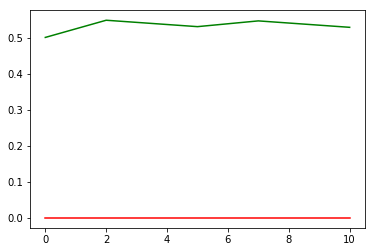

Working on... C
51.7947467923121
Window: 0
[[ 98  12]
 [122  19]]
F1,score 0.22093023255813954
Accuracy: 0.46613545816733065
2.782559402207126
Window: 2
[[113   0]
 [135   3]]
F1,score 0.042553191489361694
Accuracy: 0.46215139442231074
0.046415888336127774
Window: 5
[[108   0]
 [142   0]]
F1,score 0.0
Accuracy: 0.432


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.3593813663804626
Window: 7
[[100   0]
 [149   1]]
F1,score 0.013245033112582783
Accuracy: 0.404
0.005994842503189409
Window: 10
[[ 89   0]
 [160   0]]
F1,score 0.0
Accuracy: 0.357429718875502
[0, 0, 0, 0, 0]
[0.46613545816733065, 0.46215139442231074, 0.432, 0.404, 0.357429718875502]
accuracy
accuracy


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


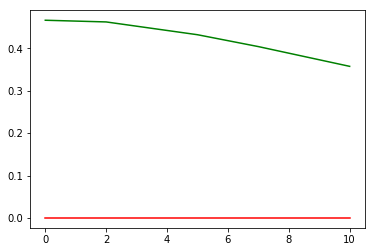

Working on... CAT
21.54434690031882
Window: 0
[[123   0]
 [128   0]]
F1,score 0.0
Accuracy: 0.4900398406374502


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0001
Window: 2
[[108   2]
 [135   6]]
F1,score 0.08053691275167785
Accuracy: 0.4541832669322709
11.787686347935873
Window: 5
[[106   2]
 [141   1]]
F1,score 0.013793103448275864
Accuracy: 0.428
138.94954943731375
Window: 7
[[106   4]
 [135   5]]
F1,score 0.06711409395973154
Accuracy: 0.444
0.0001
Window: 10
[[ 97   0]
 [143   9]]
F1,score 0.11180124223602485
Accuracy: 0.42570281124497994
[0, 0, 0, 0, 0]
[0.4900398406374502, 0.4541832669322709, 0.428, 0.444, 0.42570281124497994]
accuracy
accuracy


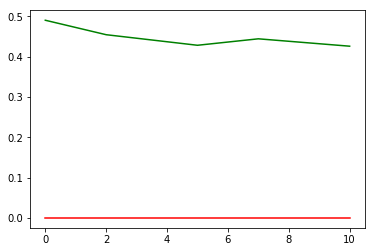

Working on... CELG
19.306977288832496
Window: 0
[[123   1]
 [123   4]]
F1,score 0.06060606060606061
Accuracy: 0.5059760956175299
2.782559402207126
Window: 2
[[120   0]
 [127   4]]
F1,score 0.059259259259259255
Accuracy: 0.4940239043824701
166.81005372000558
Window: 5
[[113   2]
 [124  11]]
F1,score 0.14864864864864866
Accuracy: 0.496
1291.5496650148827
Window: 7
[[104  10]
 [116  20]]
F1,score 0.24096385542168675
Accuracy: 0.496
11.787686347935873
Window: 10
[[115   0]
 [128   6]]
F1,score 0.08571428571428572
Accuracy: 0.4859437751004016
[0, 0, 0, 0, 0]
[0.5059760956175299, 0.4940239043824701, 0.496, 0.496, 0.4859437751004016]
accuracy
accuracy


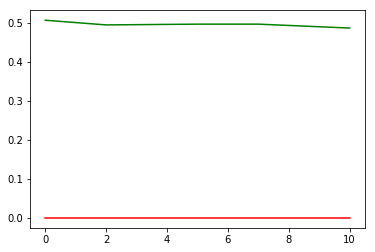

Working on... CHL
21.54434690031882
Window: 0
[[35 89]
 [33 94]]
F1,score 0.6064516129032258
Accuracy: 0.5139442231075697
0.000774263682681127
Window: 2
[[ 36 103]
 [ 25  87]]
F1,score 0.576158940397351
Accuracy: 0.4900398406374502
0.0001
Window: 5
[[ 30 118]
 [ 16  86]]
F1,score 0.5620915032679739
Accuracy: 0.464
0.005994842503189409
Window: 7
[[88 52]
 [42 68]]
F1,score 0.591304347826087
Accuracy: 0.624
1.637893706954064
Window: 10
[[63 78]
 [23 85]]
F1,score 0.6273062730627307
Accuracy: 0.5943775100401606
[0, 0, 0, 0, 0]
[0.5139442231075697, 0.4900398406374502, 0.464, 0.624, 0.5943775100401606]
accuracy
accuracy


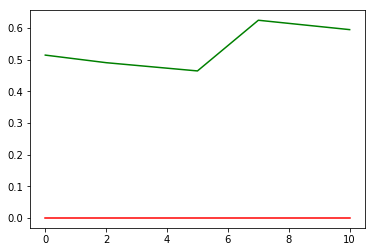

Working on... CHTR
10000.0
Window: 0
[[  8 113]
 [  2 128]]
F1,score 0.6900269541778976
Accuracy: 0.5418326693227091
10000.0
Window: 2
[[65 45]
 [95 46]]
F1,score 0.39655172413793105
Accuracy: 0.44223107569721115
1000.0
Window: 5
[[43 63]
 [65 79]]
F1,score 0.5524475524475525
Accuracy: 0.488
372.7593720314938
Window: 7
[[ 34  67]
 [ 48 101]]
F1,score 0.6372239747634069
Accuracy: 0.54
1291.5496650148827
Window: 10
[[  3  82]
 [ 13 151]]
F1,score 0.760705289672544
Accuracy: 0.6184738955823293
[0, 0, 0, 0, 0]
[0.5418326693227091, 0.44223107569721115, 0.488, 0.54, 0.6184738955823293]
accuracy
accuracy


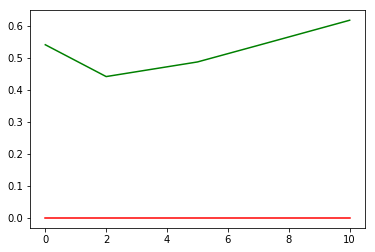

Working on... CMCSA
51.7947467923121
Window: 0
[[  0 124]
 [  0 127]]
F1,score 0.671957671957672
Accuracy: 0.5059760956175299
1291.5496650148827
Window: 2
[[106   7]
 [131   7]]
F1,score 0.09210526315789475
Accuracy: 0.450199203187251
1291.5496650148827
Window: 5
[[118   3]
 [121   8]]
F1,score 0.11428571428571428
Accuracy: 0.504
10000.0
Window: 7
[[ 96  14]
 [127  13]]
F1,score 0.155688622754491
Accuracy: 0.436
1000.0
Window: 10
[[ 94   1]
 [144  10]]
F1,score 0.1212121212121212
Accuracy: 0.41767068273092367
[0, 0, 0, 0, 0]
[0.5059760956175299, 0.450199203187251, 0.504, 0.436, 0.41767068273092367]
accuracy
accuracy


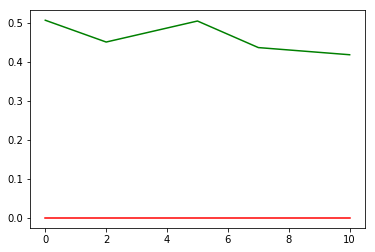

Working on... CODI
2.782559402207126
Window: 0
[[116   0]
 [135   0]]
F1,score 0.0
Accuracy: 0.46215139442231074


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


7.196856730011519
Window: 2
[[115   0]
 [136   0]]
F1,score 0.0
Accuracy: 0.4581673306772908


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


11.787686347935873
Window: 5
[[114   0]
 [136   0]]
F1,score 0.0
Accuracy: 0.456


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


4.39397056076079
Window: 7
[[113   0]
 [137   0]]
F1,score 0.0
Accuracy: 0.452


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


7.196856730011519
Window: 10
[[120   0]
 [123   6]]
F1,score 0.08888888888888888
Accuracy: 0.5060240963855421
[0, 0, 0, 0, 0]
[0.46215139442231074, 0.4581673306772908, 0.456, 0.452, 0.5060240963855421]
accuracy
accuracy


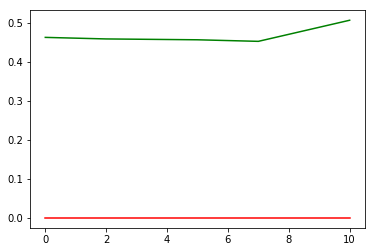

Working on... CSCO
0.005994842503189409
Window: 0
[[118   0]
 [133   0]]
F1,score 0.0
Accuracy: 0.4701195219123506


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


31.622776601683793
Window: 2
[[  0 113]
 [  0 138]]
F1,score 0.7095115681233933
Accuracy: 0.549800796812749
31.622776601683793
Window: 5
[[122   0]
 [128   0]]
F1,score 0.0
Accuracy: 0.488


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


31.622776601683793
Window: 7
[[121   0]
 [129   0]]
F1,score 0.0
Accuracy: 0.484


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


51.7947467923121
Window: 10
[[126   1]
 [121   1]]
F1,score 0.016129032258064516
Accuracy: 0.5100401606425703
[0, 0, 0, 0, 0]
[0.4701195219123506, 0.549800796812749, 0.488, 0.484, 0.5100401606425703]
accuracy
accuracy


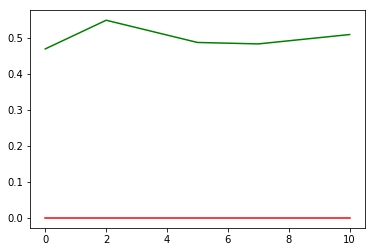

Working on... CVX
21.54434690031882
Window: 0
[[119  17]
 [ 98  17]]
F1,score 0.22818791946308725
Accuracy: 0.5418326693227091
2.6826957952797255
Window: 2
[[125   0]
 [124   2]]
F1,score 0.03125
Accuracy: 0.5059760956175299
21.54434690031882
Window: 5
[[116   0]
 [131   3]]
F1,score 0.043795620437956206
Accuracy: 0.476
1.0
Window: 7
[[122   3]
 [107  18]]
F1,score 0.2465753424657534
Accuracy: 0.56
1.637893706954064
Window: 10
[[120  10]
 [ 93  26]]
F1,score 0.3354838709677419
Accuracy: 0.5863453815261044
[0, 0, 0, 0, 0]
[0.5418326693227091, 0.5059760956175299, 0.476, 0.56, 0.5863453815261044]
accuracy
accuracy


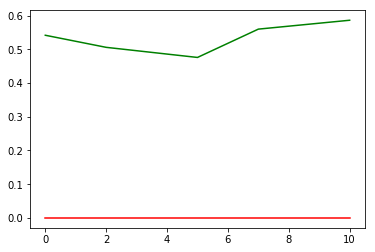

Working on... D
7.196856730011519
Window: 0
[[  1 106]
 [  0 144]]
F1,score 0.730964467005076
Accuracy: 0.5776892430278885
84.83428982440716
Window: 2
[[103  14]
 [ 96  38]]
F1,score 0.4086021505376343
Accuracy: 0.5617529880478087
138.94954943731375
Window: 5
[[96 11]
 [83 60]]
F1,score 0.5607476635514019
Accuracy: 0.624
227.58459260747887
Window: 7
[[91 15]
 [76 68]]
F1,score 0.5991189427312774
Accuracy: 0.636
84.83428982440716
Window: 10
[[91 11]
 [83 64]]
F1,score 0.5765765765765766
Accuracy: 0.6224899598393574
[0, 0, 0, 0, 0]
[0.5776892430278885, 0.5617529880478087, 0.624, 0.636, 0.6224899598393574]
accuracy
accuracy


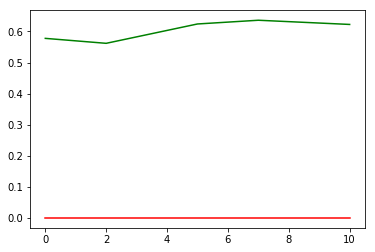

Working on... DHR
1.0
Window: 0
[[123   0]
 [128   0]]
F1,score 0.0
Accuracy: 0.4900398406374502


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


1.0
Window: 2
[[126   0]
 [125   0]]
F1,score 0.0
Accuracy: 0.50199203187251


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


10000.0
Window: 5
[[68 53]
 [69 60]]
F1,score 0.49586776859504134
Accuracy: 0.512
10000.0
Window: 7
[[69 47]
 [74 60]]
F1,score 0.4979253112033195
Accuracy: 0.516
166.81005372000558
Window: 10
[[112   5]
 [128   4]]
F1,score 0.056737588652482275
Accuracy: 0.46586345381526106
[0, 0, 0, 0, 0]
[0.4900398406374502, 0.50199203187251, 0.512, 0.516, 0.46586345381526106]
accuracy
accuracy


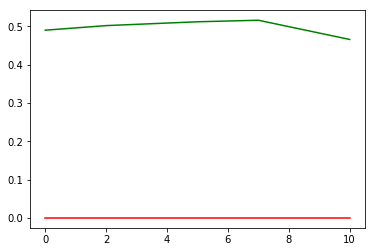

Working on... DIS
610.5402296585327
Window: 0
[[118   0]
 [133   0]]
F1,score 0.0
Accuracy: 0.4701195219123506


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


10000.0
Window: 2
[[109   1]
 [138   3]]
F1,score 0.04137931034482758
Accuracy: 0.44621513944223107
10000.0
Window: 5
[[104   0]
 [146   0]]
F1,score 0.0
Accuracy: 0.416


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.000774263682681127
Window: 7
[[102   0]
 [148   0]]
F1,score 0.0
Accuracy: 0.408


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


372.7593720314938
Window: 10
[[101   0]
 [148   0]]
F1,score 0.0
Accuracy: 0.40562248995983935
[0, 0, 0, 0, 0]
[0.4701195219123506, 0.44621513944223107, 0.416, 0.408, 0.40562248995983935]
accuracy
accuracy


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


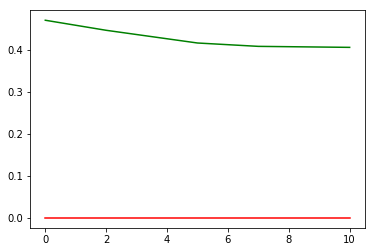

Working on... DUK
0.005994842503189409
Window: 0
[[  0 111]
 [  0 140]]
F1,score 0.7161125319693095
Accuracy: 0.5577689243027888
372.7593720314938
Window: 2
[[57 42]
 [67 85]]
F1,score 0.6093189964157707
Accuracy: 0.5657370517928287
166.81005372000558
Window: 5
[[ 87  12]
 [125  26]]
F1,score 0.2751322751322751
Accuracy: 0.452
1000.0
Window: 7
[[ 81  11]
 [133  25]]
F1,score 0.2577319587628866
Accuracy: 0.424
0.005994842503189409
Window: 10
[[ 85   0]
 [164   0]]
F1,score 0.0
Accuracy: 0.3413654618473896
[0, 0, 0, 0, 0]
[0.5577689243027888, 0.5657370517928287, 0.452, 0.424, 0.3413654618473896]
accuracy
accuracy


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


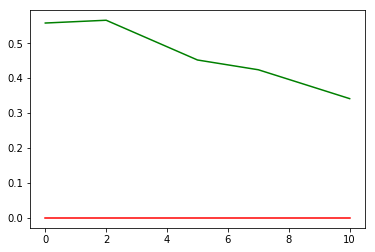

Working on... EXC
138.94954943731375
Window: 0
[[ 15 106]
 [ 13 117]]
F1,score 0.6628895184135978
Accuracy: 0.5258964143426295
1.637893706954064
Window: 2
[[107   3]
 [129  12]]
F1,score 0.15384615384615383
Accuracy: 0.47410358565737054
227.58459260747887
Window: 5
[[79 38]
 [79 54]]
F1,score 0.48000000000000004
Accuracy: 0.532
138.94954943731375
Window: 7
[[60 46]
 [58 86]]
F1,score 0.6231884057971014
Accuracy: 0.584
19.306977288832496
Window: 10
[[85 26]
 [89 49]]
F1,score 0.460093896713615
Accuracy: 0.5381526104417671
[0, 0, 0, 0, 0]
[0.5258964143426295, 0.47410358565737054, 0.532, 0.584, 0.5381526104417671]
accuracy
accuracy


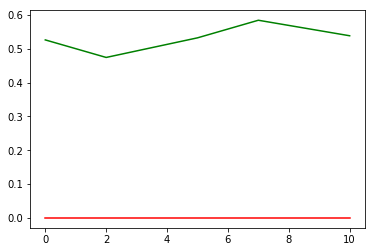

Working on... FB
1291.5496650148827
Window: 0
[[118   0]
 [133   0]]
F1,score 0.0
Accuracy: 0.4701195219123506


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


21.54434690031882
Window: 2
[[106   0]
 [145   0]]
F1,score 0.0
Accuracy: 0.42231075697211157


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


1291.5496650148827
Window: 5
[[40 56]
 [64 90]]
F1,score 0.6
Accuracy: 0.52
1000.0
Window: 7
[[  7  85]
 [ 10 148]]
F1,score 0.7570332480818414
Accuracy: 0.62
4.39397056076079
Window: 10
[[ 87   0]
 [162   0]]
F1,score 0.0
Accuracy: 0.3493975903614458
[0, 0, 0, 0, 0]
[0.4701195219123506, 0.42231075697211157, 0.52, 0.62, 0.3493975903614458]
accuracy
accuracy


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


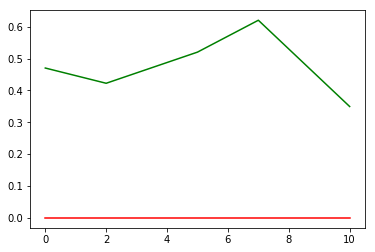

Working on... GD
227.58459260747887
Window: 0
[[112   0]
 [139   0]]
F1,score 0.0
Accuracy: 0.44621513944223107


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


1000.0
Window: 2
[[112   0]
 [139   0]]
F1,score 0.0
Accuracy: 0.44621513944223107


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


1291.5496650148827
Window: 5
[[ 96   0]
 [154   0]]
F1,score 0.0
Accuracy: 0.384


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


1000.0
Window: 7
[[ 90   0]
 [160   0]]
F1,score 0.0
Accuracy: 0.36


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


1000.0
Window: 10
[[ 88   0]
 [161   0]]
F1,score 0.0
Accuracy: 0.3534136546184739
[0, 0, 0, 0, 0]
[0.44621513944223107, 0.44621513944223107, 0.384, 0.36, 0.3534136546184739]
accuracy
accuracy


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


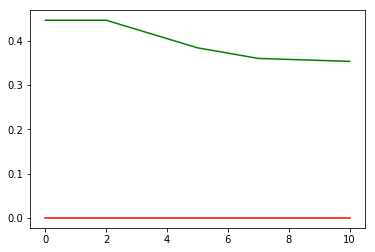

Working on... GE
10000.0
Window: 0
[[  2 135]
 [  0 114]]
F1,score 0.628099173553719
Accuracy: 0.46215139442231074
11.787686347935873
Window: 2
[[138   5]
 [105   3]]
F1,score 0.051724137931034475
Accuracy: 0.5617529880478087
11.787686347935873
Window: 5
[[138  18]
 [ 88   6]]
F1,score 0.10169491525423728
Accuracy: 0.576
227.58459260747887
Window: 7
[[ 58 104]
 [ 29  59]]
F1,score 0.4701195219123505
Accuracy: 0.468
1000.0
Window: 10
[[ 52 118]
 [ 23  56]]
F1,score 0.44268774703557306
Accuracy: 0.43373493975903615
[0, 0, 0, 0, 0]
[0.46215139442231074, 0.5617529880478087, 0.576, 0.468, 0.43373493975903615]
accuracy
accuracy


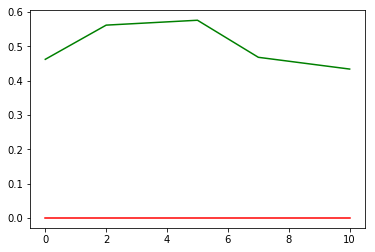

Working on... GMRE
19.306977288832496
Window: 0
[[ 5 29]
 [ 4 21]]
F1,score 0.5599999999999999
Accuracy: 0.4406779661016949
31.622776601683793
Window: 2
[[ 7 24]
 [ 5 22]]
F1,score 0.6027397260273973
Accuracy: 0.5
0.000774263682681127
Window: 5
[[29  2]
 [12 15]]
F1,score 0.6818181818181819
Accuracy: 0.7586206896551724
0.005994842503189409
Window: 7
[[29  3]
 [12 13]]
F1,score 0.6341463414634146
Accuracy: 0.7368421052631579
0.0001
Window: 10
[[27  6]
 [15  9]]
F1,score 0.4615384615384615
Accuracy: 0.631578947368421
[0, 0, 0, 0, 0]
[0.4406779661016949, 0.5, 0.7586206896551724, 0.7368421052631579, 0.631578947368421]
accuracy
accuracy


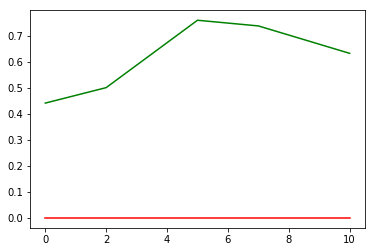

Working on... GOOG
1.0
Window: 0
[[  0 109]
 [  0 142]]
F1,score 0.7226463104325701
Accuracy: 0.5657370517928287
1.0
Window: 2
[[103   0]
 [148   0]]
F1,score 0.0
Accuracy: 0.4103585657370518


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


1.0
Window: 5
[[101   0]
 [149   0]]
F1,score 0.0
Accuracy: 0.404


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


1.0
Window: 7
[[107   0]
 [143   0]]
F1,score 0.0
Accuracy: 0.428


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


1.0
Window: 10
[[102   0]
 [147   0]]
F1,score 0.0
Accuracy: 0.40963855421686746
[0, 0, 0, 0, 0]
[0.5657370517928287, 0.4103585657370518, 0.404, 0.428, 0.40963855421686746]
accuracy
accuracy


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


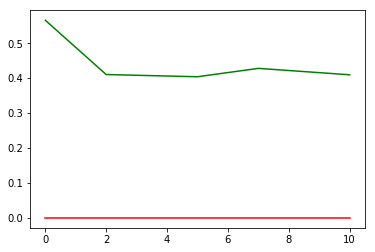

Working on... HD
372.7593720314938
Window: 0
[[102  20]
 [104  25]]
F1,score 0.28735632183908044
Accuracy: 0.5059760956175299
10000.0
Window: 2
[[62 52]
 [77 60]]
F1,score 0.4819277108433735
Accuracy: 0.4860557768924303
21.54434690031882
Window: 5
[[109   0]
 [141   0]]
F1,score 0.0
Accuracy: 0.436


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.046415888336127774
Window: 7
[[108   0]
 [142   0]]
F1,score 0.0
Accuracy: 0.432


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


10000.0
Window: 10
[[68 40]
 [70 71]]
F1,score 0.5634920634920635
Accuracy: 0.5582329317269076
[0, 0, 0, 0, 0]
[0.5059760956175299, 0.4860557768924303, 0.436, 0.432, 0.5582329317269076]
accuracy
accuracy


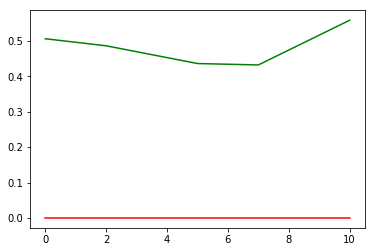

Working on... HON
1291.5496650148827
Window: 0
[[106  24]
 [102  19]]
F1,score 0.23170731707317072
Accuracy: 0.49800796812749004
11.787686347935873
Window: 2
[[100   5]
 [135  11]]
F1,score 0.13580246913580246
Accuracy: 0.44223107569721115
1291.5496650148827
Window: 5
[[ 25  72]
 [ 16 137]]
F1,score 0.7569060773480664
Accuracy: 0.648
227.58459260747887
Window: 7
[[ 54  34]
 [108  54]]
F1,score 0.43199999999999994
Accuracy: 0.432
610.5402296585327
Window: 10
[[ 64  12]
 [131  42]]
F1,score 0.37004405286343617
Accuracy: 0.42570281124497994
[0, 0, 0, 0, 0]
[0.49800796812749004, 0.44223107569721115, 0.648, 0.432, 0.42570281124497994]
accuracy
accuracy


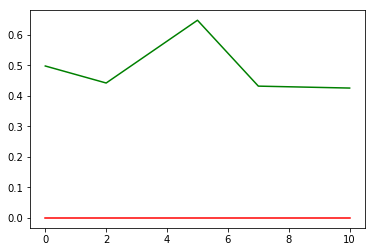

Working on... HRG
1291.5496650148827
Window: 0
[[  0 117]
 [  2 132]]
F1,score 0.6892950391644909
Accuracy: 0.5258964143426295
227.58459260747887
Window: 2
[[ 90  33]
 [102  26]]
F1,score 0.27807486631016043
Accuracy: 0.46215139442231074
372.7593720314938
Window: 5
[[119   5]
 [120   6]]
F1,score 0.0875912408759124
Accuracy: 0.5
31.622776601683793
Window: 7
[[119   0]
 [131   0]]
F1,score 0.0
Accuracy: 0.476


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


138.94954943731375
Window: 10
[[124   0]
 [125   0]]
F1,score 0.0
Accuracy: 0.4979919678714859
[0, 0, 0, 0, 0]
[0.5258964143426295, 0.46215139442231074, 0.5, 0.476, 0.4979919678714859]
accuracy
accuracy


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


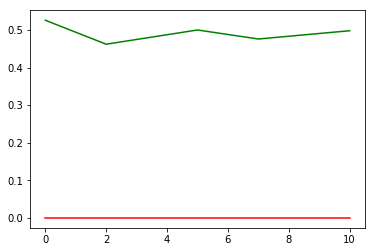

Working on... HSBC
1291.5496650148827
Window: 0
[[ 22  94]
 [ 29 106]]
F1,score 0.6328358208955224
Accuracy: 0.5099601593625498
227.58459260747887
Window: 2
[[105   0]
 [146   0]]
F1,score 0.0
Accuracy: 0.41832669322709165


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


1000.0
Window: 5
[[105   0]
 [145   0]]
F1,score 0.0
Accuracy: 0.42


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


31.622776601683793
Window: 7
[[ 97   0]
 [153   0]]
F1,score 0.0
Accuracy: 0.388


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


1.0
Window: 10
[[46 37]
 [68 98]]
F1,score 0.6511627906976745
Accuracy: 0.5783132530120482
[0, 0, 0, 0, 0]
[0.5099601593625498, 0.41832669322709165, 0.42, 0.388, 0.5783132530120482]
accuracy
accuracy


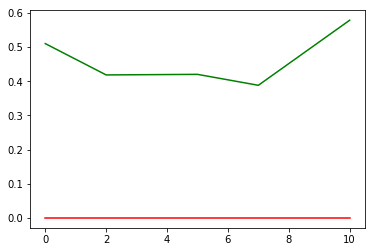

Working on... IEP
227.58459260747887
Window: 0
[[45 75]
 [50 81]]
F1,score 0.564459930313589
Accuracy: 0.50199203187251
19.306977288832496
Window: 2
[[136   0]
 [115   0]]
F1,score 0.0
Accuracy: 0.5418326693227091


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


11.787686347935873
Window: 5
[[131   0]
 [119   0]]
F1,score 0.0
Accuracy: 0.524


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


21.54434690031882
Window: 7
[[140   0]
 [110   0]]
F1,score 0.0
Accuracy: 0.56


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


11.787686347935873
Window: 10
[[138   0]
 [111   0]]
F1,score 0.0
Accuracy: 0.5542168674698795
[0, 0, 0, 0, 0]
[0.50199203187251, 0.5418326693227091, 0.524, 0.56, 0.5542168674698795]
accuracy
accuracy


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


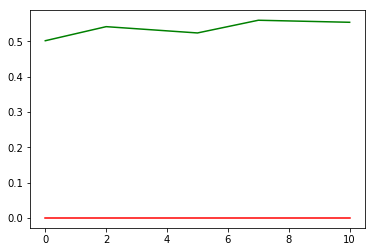

Working on... INTC
84.83428982440716
Window: 0
[[  9 117]
 [  4 121]]
F1,score 0.6666666666666666
Accuracy: 0.5179282868525896
21.54434690031882
Window: 2
[[94 31]
 [78 48]]
F1,score 0.46829268292682924
Accuracy: 0.5657370517928287
1.637893706954064
Window: 5
[[127   0]
 [123   0]]
F1,score 0.0
Accuracy: 0.508


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


4.39397056076079
Window: 7
[[118   0]
 [132   0]]
F1,score 0.0
Accuracy: 0.472


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


166.81005372000558
Window: 10
[[ 34  88]
 [ 26 101]]
F1,score 0.639240506329114
Accuracy: 0.5421686746987951
[0, 0, 0, 0, 0]
[0.5179282868525896, 0.5657370517928287, 0.508, 0.472, 0.5421686746987951]
accuracy
accuracy


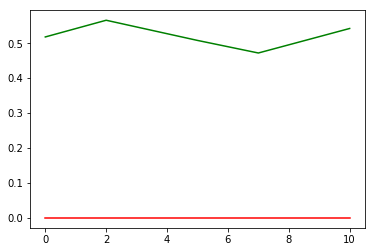

Working on... JNJ
1000.0
Window: 0
[[ 99  16]
 [118  18]]
F1,score 0.21176470588235297
Accuracy: 0.46613545816733065
51.7947467923121
Window: 2
[[113   4]
 [129   5]]
F1,score 0.06993006993006992
Accuracy: 0.4701195219123506
1291.5496650148827
Window: 5
[[111   9]
 [114  16]]
F1,score 0.2064516129032258
Accuracy: 0.508
10000.0
Window: 7
[[63 56]
 [66 65]]
F1,score 0.5158730158730158
Accuracy: 0.512
1.0
Window: 10
[[122   0]
 [127   0]]
F1,score 0.0
Accuracy: 0.4899598393574297
[0, 0, 0, 0, 0]
[0.46613545816733065, 0.4701195219123506, 0.508, 0.512, 0.4899598393574297]
accuracy
accuracy


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


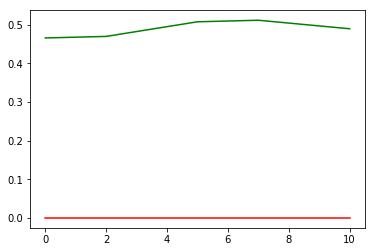

Working on... JPM
227.58459260747887
Window: 0
[[112   0]
 [139   0]]
F1,score 0.0
Accuracy: 0.44621513944223107


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


227.58459260747887
Window: 2
[[110   0]
 [140   1]]
F1,score 0.014084507042253521
Accuracy: 0.44223107569721115
84.83428982440716
Window: 5
[[103   0]
 [147   0]]
F1,score 0.0
Accuracy: 0.412


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


138.94954943731375
Window: 7
[[103   0]
 [146   1]]
F1,score 0.013513513513513513
Accuracy: 0.416
84.83428982440716
Window: 10
[[ 94   0]
 [155   0]]
F1,score 0.0
Accuracy: 0.37751004016064255
[0, 0, 0, 0, 0]
[0.44621513944223107, 0.44223107569721115, 0.412, 0.416, 0.37751004016064255]
accuracy
accuracy


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


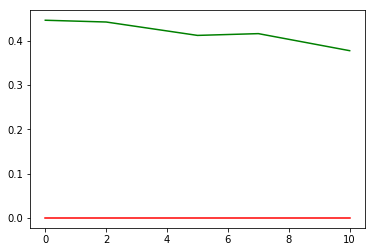

Working on... KO
84.83428982440716
Window: 0
[[  0 115]
 [  0 136]]
F1,score 0.7028423772609819
Accuracy: 0.5418326693227091
610.5402296585327
Window: 2
[[ 29  76]
 [ 29 117]]
F1,score 0.6902654867256637
Accuracy: 0.5816733067729084
1000.0
Window: 5
[[ 11  98]
 [  3 138]]
F1,score 0.7320954907161803
Accuracy: 0.596
610.5402296585327
Window: 7
[[ 29  84]
 [  9 128]]
F1,score 0.7335243553008595
Accuracy: 0.628
10000.0
Window: 10
[[  1 109]
 [  0 139]]
F1,score 0.718346253229974
Accuracy: 0.5622489959839357
[0, 0, 0, 0, 0]
[0.5418326693227091, 0.5816733067729084, 0.596, 0.628, 0.5622489959839357]
accuracy
accuracy


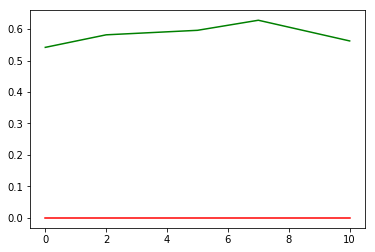

Working on... LMT
10000.0
Window: 0
[[ 17 111]
 [ 14 109]]
F1,score 0.6355685131195334
Accuracy: 0.50199203187251
10000.0
Window: 2
[[  3 111]
 [  6 131]]
F1,score 0.6912928759894459
Accuracy: 0.5338645418326693
10000.0
Window: 5
[[  3 100]
 [  8 139]]
F1,score 0.7202072538860105
Accuracy: 0.568
10000.0
Window: 7
[[  4  93]
 [  6 147]]
F1,score 0.7480916030534351
Accuracy: 0.604
10000.0
Window: 10
[[  7  78]
 [  0 164]]
F1,score 0.8078817733990148
Accuracy: 0.6867469879518072
[0, 0, 0, 0, 0]
[0.50199203187251, 0.5338645418326693, 0.568, 0.604, 0.6867469879518072]
accuracy
accuracy


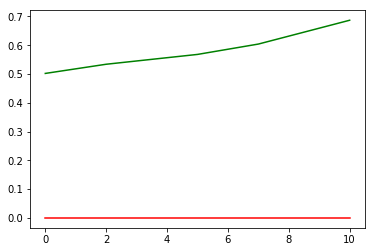

Working on... MA
1.0
Window: 0
[[114   0]
 [137   0]]
F1,score 0.0
Accuracy: 0.4541832669322709


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


372.7593720314938
Window: 2
[[ 87   0]
 [164   0]]
F1,score 0.0
Accuracy: 0.3466135458167331


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


10000.0
Window: 5
[[ 75   0]
 [163  12]]
F1,score 0.12834224598930483
Accuracy: 0.348
10000.0
Window: 7
[[ 70   0]
 [169  11]]
F1,score 0.11518324607329843
Accuracy: 0.324
10000.0
Window: 10
[[ 65   0]
 [178   6]]
F1,score 0.06315789473684211
Accuracy: 0.285140562248996
[0, 0, 0, 0, 0]
[0.4541832669322709, 0.3466135458167331, 0.348, 0.324, 0.285140562248996]
accuracy
accuracy


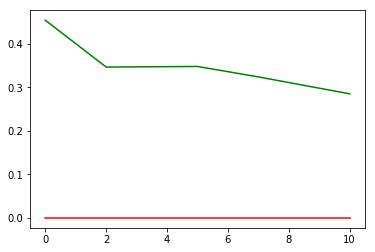

Working on... MCD
2.782559402207126
Window: 0
[[  0 121]
 [  0 130]]
F1,score 0.6824146981627296
Accuracy: 0.5179282868525896
1000.0
Window: 2
[[ 63  29]
 [120  39]]
F1,score 0.3436123348017621
Accuracy: 0.4063745019920319
1291.5496650148827
Window: 5
[[ 58  19]
 [139  34]]
F1,score 0.3008849557522124
Accuracy: 0.368
610.5402296585327
Window: 7
[[ 51  22]
 [148  29]]
F1,score 0.2543859649122807
Accuracy: 0.32
10000.0
Window: 10
[[ 47  17]
 [158  27]]
F1,score 0.23580786026200876
Accuracy: 0.2971887550200803
[0, 0, 0, 0, 0]
[0.5179282868525896, 0.4063745019920319, 0.368, 0.32, 0.2971887550200803]
accuracy
accuracy


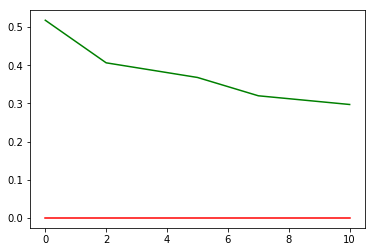

Working on... MDT
10000.0
Window: 0
[[ 10 106]
 [ 11 124]]
F1,score 0.6794520547945205
Accuracy: 0.5338645418326693
10000.0
Window: 2
[[  0 124]
 [  0 127]]
F1,score 0.671957671957672
Accuracy: 0.5059760956175299
1291.5496650148827
Window: 5
[[ 19 102]
 [ 11 118]]
F1,score 0.6762177650429798
Accuracy: 0.548
10000.0
Window: 7
[[ 22 113]
 [  7 108]]
F1,score 0.6428571428571428
Accuracy: 0.52
610.5402296585327
Window: 10
[[ 34  98]
 [ 10 107]]
F1,score 0.6645962732919255
Accuracy: 0.5662650602409639
[0, 0, 0, 0, 0]
[0.5338645418326693, 0.5059760956175299, 0.548, 0.52, 0.5662650602409639]
accuracy
accuracy


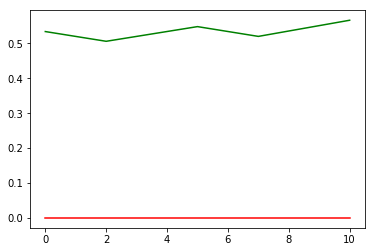

Working on... MMM
51.7947467923121
Window: 0
[[121   0]
 [130   0]]
F1,score 0.0
Accuracy: 0.4820717131474104


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


21.54434690031882
Window: 2
[[122   0]
 [129   0]]
F1,score 0.0
Accuracy: 0.4860557768924303


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


7.196856730011519
Window: 5
[[113   0]
 [137   0]]
F1,score 0.0
Accuracy: 0.452


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


31.622776601683793
Window: 7
[[102  15]
 [110  23]]
F1,score 0.26900584795321636
Accuracy: 0.5
51.7947467923121
Window: 10
[[ 96  16]
 [117  20]]
F1,score 0.2312138728323699
Accuracy: 0.46586345381526106
[0, 0, 0, 0, 0]
[0.4820717131474104, 0.4860557768924303, 0.452, 0.5, 0.46586345381526106]
accuracy
accuracy


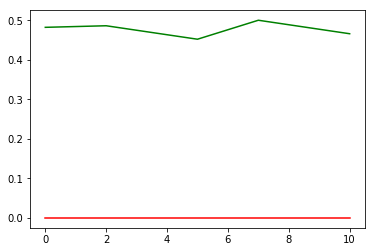

Working on... MO
610.5402296585327
Window: 0
[[70 46]
 [90 45]]
F1,score 0.39823008849557523
Accuracy: 0.4581673306772908
10000.0
Window: 2
[[43 82]
 [37 89]]
F1,score 0.5993265993265994
Accuracy: 0.5258964143426295
1291.5496650148827
Window: 5
[[58 57]
 [53 82]]
F1,score 0.5985401459854014
Accuracy: 0.56
1000.0
Window: 7
[[69 47]
 [62 72]]
F1,score 0.5691699604743083
Accuracy: 0.564
0.000774263682681127
Window: 10
[[119   0]
 [130   0]]
F1,score 0.0
Accuracy: 0.4779116465863454
[0, 0, 0, 0, 0]
[0.4581673306772908, 0.5258964143426295, 0.56, 0.564, 0.4779116465863454]
accuracy
accuracy


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


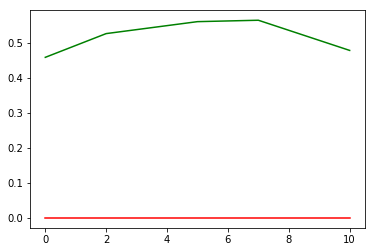

Working on... MRK
0.0001
Window: 0
[[126   0]
 [125   0]]
F1,score 0.0
Accuracy: 0.50199203187251


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


7.196856730011519
Window: 2
[[129   0]
 [122   0]]
F1,score 0.0
Accuracy: 0.5139442231075697


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


2.782559402207126
Window: 5
[[140   0]
 [110   0]]
F1,score 0.0
Accuracy: 0.56


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


51.7947467923121
Window: 7
[[131   0]
 [119   0]]
F1,score 0.0
Accuracy: 0.524


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


51.7947467923121
Window: 10
[[133   0]
 [116   0]]
F1,score 0.0
Accuracy: 0.5341365461847389
[0, 0, 0, 0, 0]
[0.50199203187251, 0.5139442231075697, 0.56, 0.524, 0.5341365461847389]
accuracy
accuracy


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


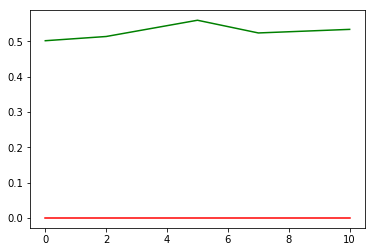

Working on... MSFT
31.622776601683793
Window: 0
[[102  15]
 [115  19]]
F1,score 0.2261904761904762
Accuracy: 0.4820717131474104
1291.5496650148827
Window: 2
[[ 42  63]
 [ 37 109]]
F1,score 0.6855345911949686
Accuracy: 0.601593625498008
10000.0
Window: 5
[[64 45]
 [78 63]]
F1,score 0.5060240963855422
Accuracy: 0.508
10000.0
Window: 7
[[ 17  82]
 [ 16 135]]
F1,score 0.733695652173913
Accuracy: 0.608
10000.0
Window: 10
[[  0 102]
 [  0 147]]
F1,score 0.7424242424242424
Accuracy: 0.5903614457831325
[0, 0, 0, 0, 0]
[0.4820717131474104, 0.601593625498008, 0.508, 0.608, 0.5903614457831325]
accuracy
accuracy


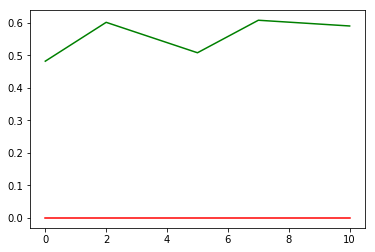

Working on... NEE
610.5402296585327
Window: 0
[[  2  98]
 [  3 148]]
F1,score 0.7455919395465995
Accuracy: 0.5976095617529881
1291.5496650148827
Window: 2
[[48 42]
 [79 82]]
F1,score 0.575438596491228
Accuracy: 0.5179282868525896
227.58459260747887
Window: 5
[[ 66   8]
 [148  28]]
F1,score 0.2641509433962264
Accuracy: 0.376
1291.5496650148827
Window: 7
[[44 26]
 [93 87]]
F1,score 0.5938566552901025
Accuracy: 0.524
10000.0
Window: 10
[[ 28  43]
 [ 25 153]]
F1,score 0.8181818181818181
Accuracy: 0.7269076305220884
[0, 0, 0, 0, 0]
[0.5976095617529881, 0.5179282868525896, 0.376, 0.524, 0.7269076305220884]
accuracy
accuracy


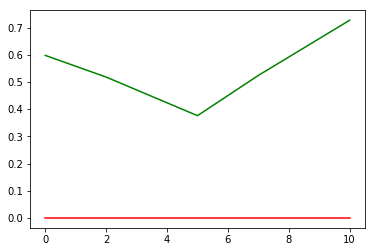

Working on... NGG
19.306977288832496
Window: 0
[[61 48]
 [96 46]]
F1,score 0.38983050847457634
Accuracy: 0.4262948207171315
166.81005372000558
Window: 2
[[ 15 101]
 [  6 129]]
F1,score 0.7068493150684931
Accuracy: 0.5737051792828686
10000.0
Window: 5
[[ 13 108]
 [  8 121]]
F1,score 0.6759776536312849
Accuracy: 0.536
10000.0
Window: 7
[[ 16 108]
 [  7 119]]
F1,score 0.6742209631728044
Accuracy: 0.54
10000.0
Window: 10
[[ 18 102]
 [  4 125]]
F1,score 0.7022471910112358
Accuracy: 0.5742971887550201
[0, 0, 0, 0, 0]
[0.4262948207171315, 0.5737051792828686, 0.536, 0.54, 0.5742971887550201]
accuracy
accuracy


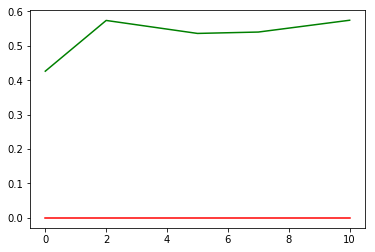

Working on... NVS
2.6826957952797255
Window: 0
[[ 19 103]
 [ 10 119]]
F1,score 0.6780626780626781
Accuracy: 0.549800796812749
0.046415888336127774
Window: 2
[[40 76]
 [37 98]]
F1,score 0.6343042071197411
Accuracy: 0.549800796812749
0.0001
Window: 5
[[38 82]
 [32 98]]
F1,score 0.6322580645161291
Accuracy: 0.544
0.000774263682681127
Window: 7
[[ 39  79]
 [ 32 100]]
F1,score 0.6430868167202572
Accuracy: 0.556
0.0001
Window: 10
[[ 39  81]
 [ 28 101]]
F1,score 0.6495176848874599
Accuracy: 0.5622489959839357
[0, 0, 0, 0, 0]
[0.549800796812749, 0.549800796812749, 0.544, 0.556, 0.5622489959839357]
accuracy
accuracy


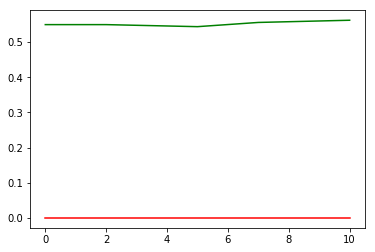

Working on... ORCL
1291.5496650148827
Window: 0
[[113   0]
 [136   2]]
F1,score 0.02857142857142857
Accuracy: 0.4581673306772908
51.7947467923121
Window: 2
[[ 87  27]
 [101  36]]
F1,score 0.36000000000000004
Accuracy: 0.4900398406374502
138.94954943731375
Window: 5
[[100  19]
 [106  25]]
F1,score 0.28571428571428575
Accuracy: 0.5
31.622776601683793
Window: 7
[[110   4]
 [117  19]]
F1,score 0.23899371069182387
Accuracy: 0.516
19.306977288832496
Window: 10
[[100  10]
 [110  29]]
F1,score 0.3258426966292135
Accuracy: 0.5180722891566265
[0, 0, 0, 0, 0]
[0.4581673306772908, 0.4900398406374502, 0.5, 0.516, 0.5180722891566265]
accuracy
accuracy


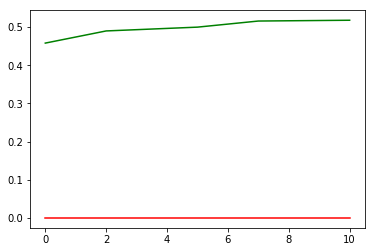

Working on... PCG
1291.5496650148827
Window: 0
[[68 46]
 [93 44]]
F1,score 0.3876651982378854
Accuracy: 0.44621513944223107
10000.0
Window: 2
[[64 40]
 [78 69]]
F1,score 0.5390624999999999
Accuracy: 0.5298804780876494
372.7593720314938
Window: 5
[[ 83  21]
 [101  45]]
F1,score 0.4245283018867924
Accuracy: 0.512
166.81005372000558
Window: 7
[[ 91   8]
 [123  28]]
F1,score 0.29946524064171126
Accuracy: 0.476
227.58459260747887
Window: 10
[[ 81  13]
 [128  27]]
F1,score 0.27692307692307694
Accuracy: 0.43373493975903615
[0, 0, 0, 0, 0]
[0.44621513944223107, 0.5298804780876494, 0.512, 0.476, 0.43373493975903615]
accuracy
accuracy


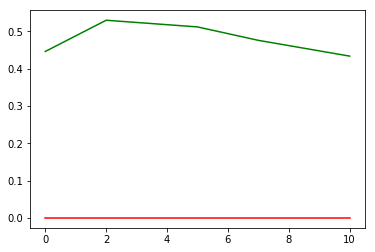

Working on... PCLN
1291.5496650148827
Window: 0
[[120   0]
 [131   0]]
F1,score 0.0
Accuracy: 0.47808764940239046


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


7.196856730011519
Window: 2
[[109   0]
 [142   0]]
F1,score 0.0
Accuracy: 0.4342629482071713


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


7.196856730011519
Window: 5
[[ 94   0]
 [156   0]]
F1,score 0.0
Accuracy: 0.376


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


7.196856730011519
Window: 7
[[ 86   0]
 [164   0]]
F1,score 0.0
Accuracy: 0.344


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


4.39397056076079
Window: 10
[[ 78   0]
 [171   0]]
F1,score 0.0
Accuracy: 0.3132530120481928
[0, 0, 0, 0, 0]
[0.47808764940239046, 0.4342629482071713, 0.376, 0.344, 0.3132530120481928]
accuracy
accuracy


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


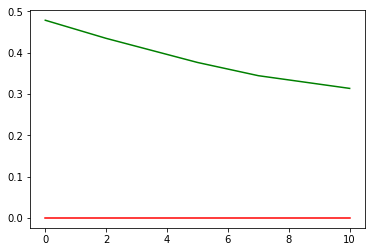

Working on... PEP
10000.0
Window: 0
[[54 54]
 [63 80]]
F1,score 0.5776173285198556
Accuracy: 0.5338645418326693
10000.0
Window: 2
[[75 39]
 [71 66]]
F1,score 0.5454545454545454
Accuracy: 0.5617529880478087
1291.5496650148827
Window: 5
[[63 41]
 [73 73]]
F1,score 0.5615384615384615
Accuracy: 0.544
10000.0
Window: 7
[[57 56]
 [44 93]]
F1,score 0.6503496503496502
Accuracy: 0.6
1291.5496650148827
Window: 10
[[81 24]
 [90 54]]
F1,score 0.48648648648648646
Accuracy: 0.5421686746987951
[0, 0, 0, 0, 0]
[0.5338645418326693, 0.5617529880478087, 0.544, 0.6, 0.5421686746987951]
accuracy
accuracy


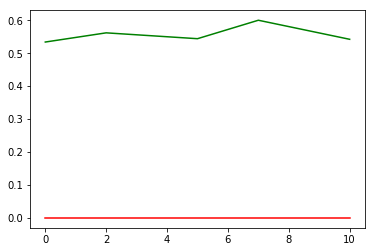

Working on... PFE
0.0001
Window: 0
[[116   0]
 [135   0]]
F1,score 0.0
Accuracy: 0.46215139442231074


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.000774263682681127
Window: 2
[[135   0]
 [115   1]]
F1,score 0.017094017094017096
Accuracy: 0.5418326693227091
7.196856730011519
Window: 5
[[142   1]
 [104   3]]
F1,score 0.05405405405405405
Accuracy: 0.58
372.7593720314938
Window: 7
[[ 10 137]
 [  2 101]]
F1,score 0.5923753665689149
Accuracy: 0.444
84.83428982440716
Window: 10
[[ 21 125]
 [  0 103]]
F1,score 0.622356495468278
Accuracy: 0.4979919678714859
[0, 0, 0, 0, 0]
[0.46215139442231074, 0.5418326693227091, 0.58, 0.444, 0.4979919678714859]
accuracy
accuracy


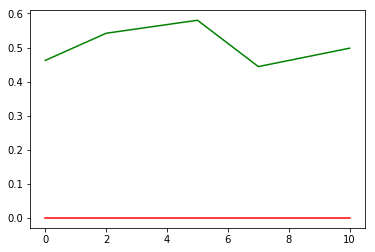

Working on... PG
11.787686347935873
Window: 0
[[119   1]
 [131   0]]
F1,score 0.0
Accuracy: 0.47410358565737054
0.046415888336127774
Window: 2
[[122   0]
 [129   0]]
F1,score 0.0
Accuracy: 0.4860557768924303


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.000774263682681127
Window: 5
[[120   0]
 [130   0]]
F1,score 0.0
Accuracy: 0.48


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.005994842503189409
Window: 7
[[115   0]
 [135   0]]
F1,score 0.0
Accuracy: 0.46


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


1.0
Window: 10
[[103   0]
 [146   0]]
F1,score 0.0
Accuracy: 0.41365461847389556
[0, 0, 0, 0, 0]
[0.47410358565737054, 0.4860557768924303, 0.48, 0.46, 0.41365461847389556]
accuracy
accuracy


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


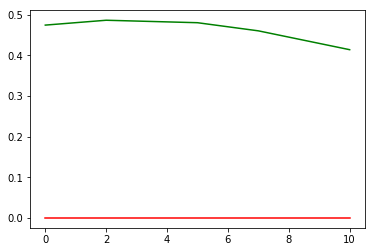

Working on... PICO
10000.0
Window: 0
[[89 32]
 [98 32]]
F1,score 0.32989690721649484
Accuracy: 0.4820717131474104
10000.0
Window: 2
[[118   6]
 [122   5]]
F1,score 0.07246376811594203
Accuracy: 0.4900398406374502
1291.5496650148827
Window: 5
[[104  25]
 [113   8]]
F1,score 0.1038961038961039
Accuracy: 0.448
10000.0
Window: 7
[[86 44]
 [99 21]]
F1,score 0.227027027027027
Accuracy: 0.428
10000.0
Window: 10
[[117  12]
 [114   6]]
F1,score 0.08695652173913045
Accuracy: 0.4939759036144578
[0, 0, 0, 0, 0]
[0.4820717131474104, 0.4900398406374502, 0.448, 0.428, 0.4939759036144578]
accuracy
accuracy


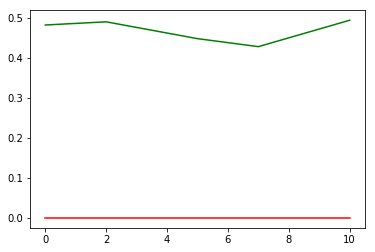

Working on... PM
21.54434690031882
Window: 0
[[ 29  85]
 [ 23 114]]
F1,score 0.6785714285714286
Accuracy: 0.5697211155378487
1.637893706954064
Window: 2
[[104   2]
 [133  12]]
F1,score 0.15094339622641506
Accuracy: 0.46215139442231074
2.782559402207126
Window: 5
[[ 94   8]
 [133  15]]
F1,score 0.1754385964912281
Accuracy: 0.436
2.6826957952797255
Window: 7
[[ 93   7]
 [138  12]]
F1,score 0.14201183431952663
Accuracy: 0.42
1.637893706954064
Window: 10
[[106   6]
 [129   8]]
F1,score 0.10596026490066224
Accuracy: 0.4578313253012048
[0, 0, 0, 0, 0]
[0.5697211155378487, 0.46215139442231074, 0.436, 0.42, 0.4578313253012048]
accuracy
accuracy


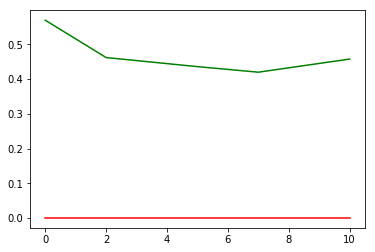

Working on... PPL
1000.0
Window: 0
[[  0 104]
 [  0 147]]
F1,score 0.7386934673366835
Accuracy: 0.5856573705179283
1291.5496650148827
Window: 2
[[ 29  77]
 [ 36 109]]
F1,score 0.6586102719033233
Accuracy: 0.549800796812749
10000.0
Window: 5
[[30 60]
 [67 93]]
F1,score 0.5942492012779553
Accuracy: 0.492
1291.5496650148827
Window: 7
[[ 28  58]
 [ 58 106]]
F1,score 0.6463414634146342
Accuracy: 0.536
1291.5496650148827
Window: 10
[[ 40  41]
 [ 68 100]]
F1,score 0.6472491909385113
Accuracy: 0.5622489959839357
[0, 0, 0, 0, 0]
[0.5856573705179283, 0.549800796812749, 0.492, 0.536, 0.5622489959839357]
accuracy
accuracy


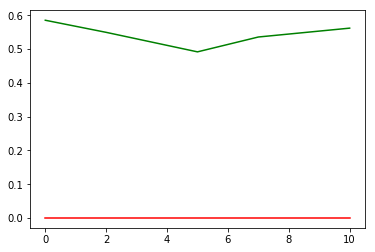

Working on... PTR
10000.0
Window: 0
[[129   9]
 [109   4]]
F1,score 0.06349206349206349
Accuracy: 0.5298804780876494
166.81005372000558
Window: 2
[[141   4]
 [106   0]]
F1,score 0.0
Accuracy: 0.5617529880478087
0.005994842503189409
Window: 5
[[145   0]
 [105   0]]
F1,score 0.0
Accuracy: 0.58


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


1291.5496650148827
Window: 7
[[149   1]
 [ 98   2]]
F1,score 0.038834951456310676
Accuracy: 0.604
10000.0
Window: 10
[[147   0]
 [ 94   8]]
F1,score 0.14545454545454545
Accuracy: 0.6224899598393574
[0, 0, 0, 0, 0]
[0.5298804780876494, 0.5617529880478087, 0.58, 0.604, 0.6224899598393574]
accuracy
accuracy


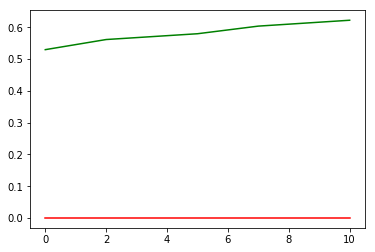

Working on... RDS-B
10000.0
Window: 0
[[  1 121]
 [  1 128]]
F1,score 0.6772486772486773
Accuracy: 0.5139442231075697
1291.5496650148827
Window: 2
[[123   0]
 [128   0]]
F1,score 0.0
Accuracy: 0.4900398406374502


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


138.94954943731375
Window: 5
[[121   0]
 [129   0]]
F1,score 0.0
Accuracy: 0.484


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


10000.0
Window: 7
[[124   5]
 [111  10]]
F1,score 0.14705882352941177
Accuracy: 0.536
372.7593720314938
Window: 10
[[123   6]
 [105  15]]
F1,score 0.2127659574468085
Accuracy: 0.5542168674698795
[0, 0, 0, 0, 0]
[0.5139442231075697, 0.4900398406374502, 0.484, 0.536, 0.5542168674698795]
accuracy
accuracy


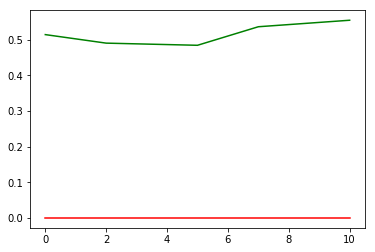

Working on... REX
1291.5496650148827
Window: 0
[[  6 123]
 [  5 117]]
F1,score 0.6464088397790055
Accuracy: 0.4900398406374502
19.306977288832496
Window: 2
[[ 38  91]
 [ 21 101]]
F1,score 0.643312101910828
Accuracy: 0.5537848605577689
372.7593720314938
Window: 5
[[  5 121]
 [  2 122]]
F1,score 0.6648501362397821
Accuracy: 0.508
372.7593720314938
Window: 7
[[  3 123]
 [  8 116]]
F1,score 0.6391184573002754
Accuracy: 0.476
1.0
Window: 10
[[106  12]
 [104  27]]
F1,score 0.31764705882352945
Accuracy: 0.5341365461847389
[0, 0, 0, 0, 0]
[0.4900398406374502, 0.5537848605577689, 0.508, 0.476, 0.5341365461847389]
accuracy
accuracy


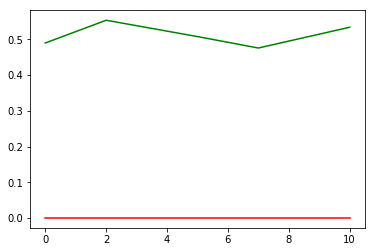

Working on... SLB
1291.5496650148827
Window: 0
[[ 27 116]
 [ 18  90]]
F1,score 0.5732484076433121
Accuracy: 0.46613545816733065
84.83428982440716
Window: 2
[[105  41]
 [ 68  37]]
F1,score 0.4043715846994536
Accuracy: 0.5657370517928287
19.306977288832496
Window: 5
[[64 79]
 [47 60]]
F1,score 0.4878048780487804
Accuracy: 0.496
51.7947467923121
Window: 7
[[70 78]
 [45 57]]
F1,score 0.48101265822784806
Accuracy: 0.508
138.94954943731375
Window: 10
[[100  64]
 [ 47  38]]
F1,score 0.40641711229946526
Accuracy: 0.5542168674698795
[0, 0, 0, 0, 0]
[0.46613545816733065, 0.5657370517928287, 0.496, 0.508, 0.5542168674698795]
accuracy
accuracy


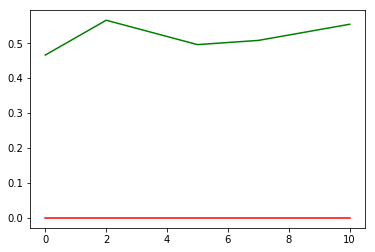

Working on... SNP
227.58459260747887
Window: 0
[[120   0]
 [131   0]]
F1,score 0.0
Accuracy: 0.47808764940239046


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


227.58459260747887
Window: 2
[[96 27]
 [92 36]]
F1,score 0.37696335078534027
Accuracy: 0.5258964143426295
11.787686347935873
Window: 5
[[123   0]
 [119   8]]
F1,score 0.11851851851851852
Accuracy: 0.524
19.306977288832496
Window: 7
[[126   0]
 [124   0]]
F1,score 0.0
Accuracy: 0.504


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


31.622776601683793
Window: 10
[[140   0]
 [109   0]]
F1,score 0.0
Accuracy: 0.5622489959839357
[0, 0, 0, 0, 0]
[0.47808764940239046, 0.5258964143426295, 0.524, 0.504, 0.5622489959839357]
accuracy
accuracy


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


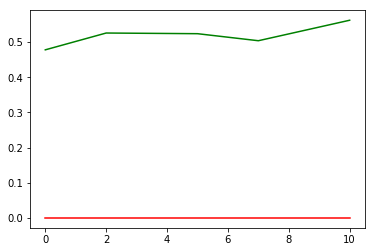

Working on... SNY
610.5402296585327
Window: 0
[[37 97]
 [34 83]]
F1,score 0.5589225589225589
Accuracy: 0.47808764940239046
1.0
Window: 2
[[39 76]
 [49 87]]
F1,score 0.5819397993311036
Accuracy: 0.50199203187251
10000.0
Window: 5
[[ 84  20]
 [123  23]]
F1,score 0.24338624338624337
Accuracy: 0.428
1.0
Window: 7
[[ 34  67]
 [ 49 100]]
F1,score 0.6329113924050632
Accuracy: 0.536
1.0
Window: 10
[[ 38  57]
 [ 43 111]]
F1,score 0.6894409937888197
Accuracy: 0.5983935742971888
[0, 0, 0, 0, 0]
[0.47808764940239046, 0.50199203187251, 0.428, 0.536, 0.5983935742971888]
accuracy
accuracy


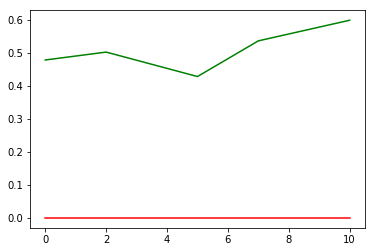

Working on... SO
31.622776601683793
Window: 0
[[  0 125]
 [  0 126]]
F1,score 0.6684350132625995
Accuracy: 0.50199203187251
1.0
Window: 2
[[45 79]
 [48 79]]
F1,score 0.5543859649122806
Accuracy: 0.4940239043824701
138.94954943731375
Window: 5
[[ 31  95]
 [ 14 110]]
F1,score 0.668693009118541
Accuracy: 0.564
0.3593813663804626
Window: 7
[[69 60]
 [57 64]]
F1,score 0.5224489795918367
Accuracy: 0.532
0.0001
Window: 10
[[80 39]
 [75 55]]
F1,score 0.4910714285714286
Accuracy: 0.5421686746987951
[0, 0, 0, 0, 0]
[0.50199203187251, 0.4940239043824701, 0.564, 0.532, 0.5421686746987951]
accuracy
accuracy


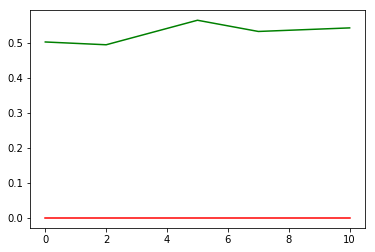

Working on... SPLP
372.7593720314938
Window: 0
[[60 36]
 [99 56]]
F1,score 0.45344129554655865
Accuracy: 0.46215139442231074
11.787686347935873
Window: 2
[[ 75  33]
 [114  29]]
F1,score 0.28292682926829266
Accuracy: 0.41434262948207173
7.196856730011519
Window: 5
[[ 69  36]
 [110  35]]
F1,score 0.32407407407407407
Accuracy: 0.416
1.0
Window: 7
[[ 74  38]
 [102  36]]
F1,score 0.33962264150943394
Accuracy: 0.44
1.637893706954064
Window: 10
[[ 72  40]
 [100  37]]
F1,score 0.34579439252336447
Accuracy: 0.43775100401606426
[0, 0, 0, 0, 0]
[0.46215139442231074, 0.41434262948207173, 0.416, 0.44, 0.43775100401606426]
accuracy
accuracy


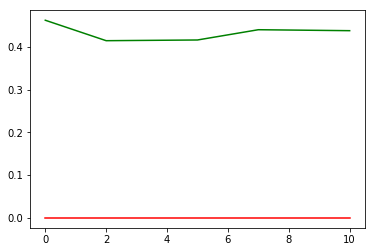

Working on... SRE
372.7593720314938
Window: 0
[[77 41]
 [76 57]]
F1,score 0.4935064935064935
Accuracy: 0.5338645418326693
138.94954943731375
Window: 2
[[68 41]
 [79 63]]
F1,score 0.5121951219512195
Accuracy: 0.5219123505976095
227.58459260747887
Window: 5
[[75 26]
 [95 54]]
F1,score 0.4716157205240175
Accuracy: 0.516
372.7593720314938
Window: 7
[[80 23]
 [99 48]]
F1,score 0.4403669724770642
Accuracy: 0.512
166.81005372000558
Window: 10
[[ 82  14]
 [115  38]]
F1,score 0.37073170731707317
Accuracy: 0.4819277108433735
[0, 0, 0, 0, 0]
[0.5338645418326693, 0.5219123505976095, 0.516, 0.512, 0.4819277108433735]
accuracy
accuracy


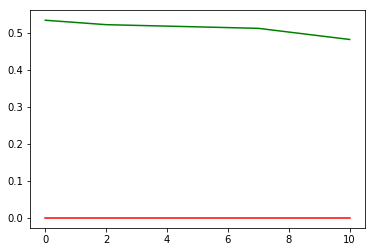

Working on... T
1.637893706954064
Window: 0
[[104  22]
 [106  19]]
F1,score 0.22891566265060243
Accuracy: 0.4900398406374502
7.196856730011519
Window: 2
[[113  19]
 [104  15]]
F1,score 0.19607843137254902
Accuracy: 0.5099601593625498
4.39397056076079
Window: 5
[[  8 127]
 [  7 108]]
F1,score 0.6171428571428571
Accuracy: 0.464
1.637893706954064
Window: 7
[[135   5]
 [106   4]]
F1,score 0.06722689075630252
Accuracy: 0.556
2.782559402207126
Window: 10
[[137   9]
 [ 92  11]]
F1,score 0.17886178861788618
Accuracy: 0.5943775100401606
[0, 0, 0, 0, 0]
[0.4900398406374502, 0.5099601593625498, 0.464, 0.556, 0.5943775100401606]
accuracy
accuracy


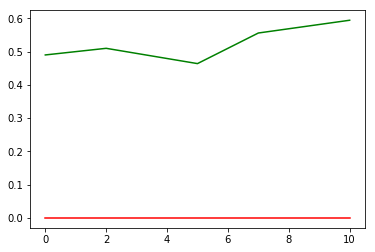

Working on... TM
0.3593813663804626
Window: 0
[[116   7]
 [121   7]]
F1,score 0.09859154929577464
Accuracy: 0.4900398406374502
2.782559402207126
Window: 2
[[60 77]
 [31 83]]
F1,score 0.6058394160583942
Accuracy: 0.5697211155378487
19.306977288832496
Window: 5
[[  1 140]
 [  1 108]]
F1,score 0.6050420168067226
Accuracy: 0.436
1.0
Window: 7
[[96 44]
 [51 59]]
F1,score 0.5539906103286385
Accuracy: 0.62
21.54434690031882
Window: 10
[[ 38 111]
 [ 12  88]]
F1,score 0.5886287625418061
Accuracy: 0.5060240963855421
[0, 0, 0, 0, 0]
[0.4900398406374502, 0.5697211155378487, 0.436, 0.62, 0.5060240963855421]
accuracy
accuracy


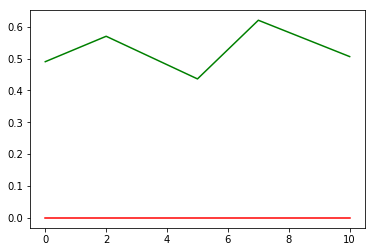

Working on... TOT
84.83428982440716
Window: 0
[[  1 142]
 [  0 108]]
F1,score 0.6033519553072626
Accuracy: 0.4342629482071713
10000.0
Window: 2
[[124   0]
 [126   1]]
F1,score 0.015625
Accuracy: 0.49800796812749004
11.787686347935873
Window: 5
[[117   2]
 [127   4]]
F1,score 0.0583941605839416
Accuracy: 0.484
51.7947467923121
Window: 7
[[115   0]
 [134   1]]
F1,score 0.014705882352941178
Accuracy: 0.464
11.787686347935873
Window: 10
[[117   0]
 [132   0]]
F1,score 0.0
Accuracy: 0.46987951807228917
[0, 0, 0, 0, 0]
[0.4342629482071713, 0.49800796812749004, 0.484, 0.464, 0.46987951807228917]
accuracy
accuracy


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


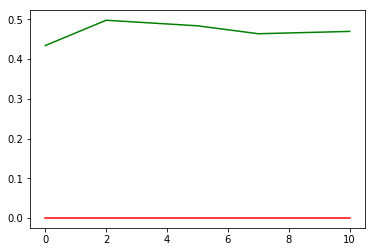

Working on... TSM
138.94954943731375
Window: 0
[[  0 117]
 [  0 134]]
F1,score 0.6961038961038961
Accuracy: 0.5338645418326693
1.0
Window: 2
[[110   0]
 [141   0]]
F1,score 0.0
Accuracy: 0.43824701195219123


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


610.5402296585327
Window: 5
[[  0 111]
 [  0 139]]
F1,score 0.7146529562982006
Accuracy: 0.556
1291.5496650148827
Window: 7
[[54 49]
 [52 95]]
F1,score 0.6529209621993126
Accuracy: 0.596
372.7593720314938
Window: 10
[[  0  90]
 [  0 159]]
F1,score 0.7794117647058824
Accuracy: 0.6385542168674698
[0, 0, 0, 0, 0]
[0.5338645418326693, 0.43824701195219123, 0.556, 0.596, 0.6385542168674698]
accuracy
accuracy


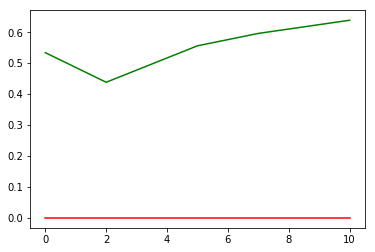

Working on... UL
227.58459260747887
Window: 0
[[89 32]
 [72 58]]
F1,score 0.5272727272727272
Accuracy: 0.5856573705179283
1000.0
Window: 2
[[70 36]
 [93 52]]
F1,score 0.44635193133047213
Accuracy: 0.4860557768924303
372.7593720314938
Window: 5
[[ 58  33]
 [103  56]]
F1,score 0.45161290322580644
Accuracy: 0.456
227.58459260747887
Window: 7
[[ 55  34]
 [105  56]]
F1,score 0.44621513944223107
Accuracy: 0.444
227.58459260747887
Window: 10
[[ 55  34]
 [104  56]]
F1,score 0.44799999999999995
Accuracy: 0.4457831325301205
[0, 0, 0, 0, 0]
[0.5856573705179283, 0.4860557768924303, 0.456, 0.444, 0.4457831325301205]
accuracy
accuracy


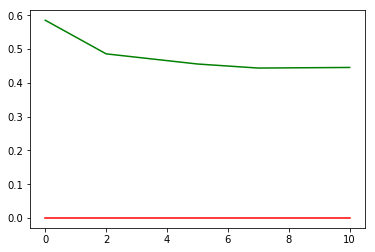

Working on... UN
166.81005372000558
Window: 0
[[79 35]
 [85 52]]
F1,score 0.46428571428571425
Accuracy: 0.5219123505976095
1291.5496650148827
Window: 2
[[69 38]
 [91 53]]
F1,score 0.451063829787234
Accuracy: 0.4860557768924303
138.94954943731375
Window: 5
[[ 52  34]
 [109  55]]
F1,score 0.43478260869565216
Accuracy: 0.428
372.7593720314938
Window: 7
[[ 46  34]
 [114  56]]
F1,score 0.4307692307692308
Accuracy: 0.408
1291.5496650148827
Window: 10
[[ 53  37]
 [105  54]]
F1,score 0.43199999999999994
Accuracy: 0.42971887550200805
[0, 0, 0, 0, 0]
[0.5219123505976095, 0.4860557768924303, 0.428, 0.408, 0.42971887550200805]
accuracy
accuracy


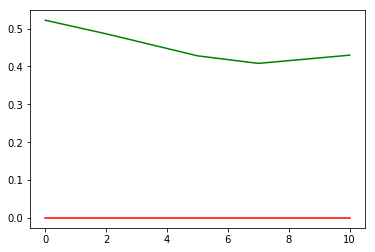

Working on... UNH
10000.0
Window: 0
[[120  10]
 [109  12]]
F1,score 0.16783216783216784
Accuracy: 0.5258964143426295
1000.0
Window: 2
[[102   0]
 [149   0]]
F1,score 0.0
Accuracy: 0.4063745019920319


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


1000.0
Window: 5
[[100   0]
 [150   0]]
F1,score 0.0
Accuracy: 0.4


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


1291.5496650148827
Window: 7
[[ 84   0]
 [166   0]]
F1,score 0.0
Accuracy: 0.336


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


1000.0
Window: 10
[[ 65   5]
 [141  38]]
F1,score 0.3423423423423424
Accuracy: 0.41365461847389556
[0, 0, 0, 0, 0]
[0.5258964143426295, 0.4063745019920319, 0.4, 0.336, 0.41365461847389556]
accuracy
accuracy


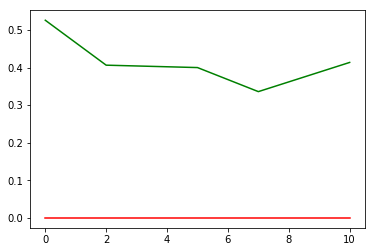

Working on... UPS
227.58459260747887
Window: 0
[[50 71]
 [38 92]]
F1,score 0.6279863481228669
Accuracy: 0.5657370517928287
227.58459260747887
Window: 2
[[118   0]
 [127   6]]
F1,score 0.08633093525179857
Accuracy: 0.4940239043824701
610.5402296585327
Window: 5
[[84 30]
 [90 46]]
F1,score 0.4339622641509434
Accuracy: 0.52
2.782559402207126
Window: 7
[[116   0]
 [134   0]]
F1,score 0.0
Accuracy: 0.464


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


31.622776601683793
Window: 10
[[119   0]
 [128   2]]
F1,score 0.030303030303030307
Accuracy: 0.4859437751004016
[0, 0, 0, 0, 0]
[0.5657370517928287, 0.4940239043824701, 0.52, 0.464, 0.4859437751004016]
accuracy
accuracy


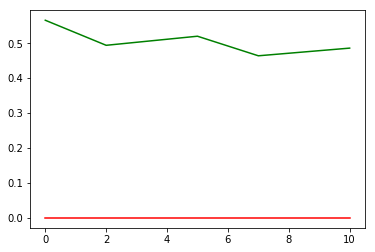

Working on... UTX
11.787686347935873
Window: 0
[[110  23]
 [ 95  23]]
F1,score 0.28048780487804875
Accuracy: 0.5298804780876494
1.637893706954064
Window: 2
[[117   7]
 [117  10]]
F1,score 0.1388888888888889
Accuracy: 0.5059760956175299
2.6826957952797255
Window: 5
[[108   8]
 [117  17]]
F1,score 0.2138364779874214
Accuracy: 0.5
1.637893706954064
Window: 7
[[ 99   6]
 [131  14]]
F1,score 0.1696969696969697
Accuracy: 0.452
1.637893706954064
Window: 10
[[101   4]
 [124  20]]
F1,score 0.2380952380952381
Accuracy: 0.4859437751004016
[0, 0, 0, 0, 0]
[0.5298804780876494, 0.5059760956175299, 0.5, 0.452, 0.4859437751004016]
accuracy
accuracy


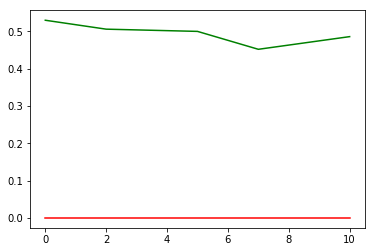

Working on... V
10000.0
Window: 0
[[  4 108]
 [  2 137]]
F1,score 0.7135416666666666
Accuracy: 0.5617529880478087
7.196856730011519
Window: 2
[[ 81  14]
 [140  16]]
F1,score 0.17204301075268819
Accuracy: 0.38645418326693226
10000.0
Window: 5
[[ 80  10]
 [147  13]]
F1,score 0.14207650273224043
Accuracy: 0.372
10000.0
Window: 7
[[ 85   3]
 [151  11]]
F1,score 0.125
Accuracy: 0.384
10000.0
Window: 10
[[ 66  16]
 [132  35]]
F1,score 0.3211009174311927
Accuracy: 0.40562248995983935
[0, 0, 0, 0, 0]
[0.5617529880478087, 0.38645418326693226, 0.372, 0.384, 0.40562248995983935]
accuracy
accuracy


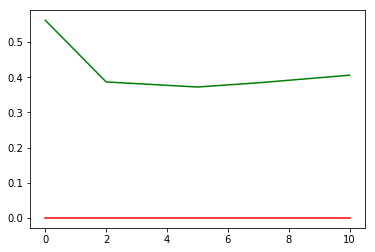

Working on... VZ
7.196856730011519
Window: 0
[[49 82]
 [45 75]]
F1,score 0.5415162454873645
Accuracy: 0.4940239043824701
4.39397056076079
Window: 2
[[58 69]
 [49 75]]
F1,score 0.5597014925373135
Accuracy: 0.5298804780876494
372.7593720314938
Window: 5
[[88 55]
 [53 54]]
F1,score 0.5
Accuracy: 0.568
227.58459260747887
Window: 7
[[60 78]
 [42 70]]
F1,score 0.5384615384615384
Accuracy: 0.52
1.637893706954064
Window: 10
[[107  43]
 [ 40  59]]
F1,score 0.5870646766169154
Accuracy: 0.6666666666666666
[0, 0, 0, 0, 0]
[0.4940239043824701, 0.5298804780876494, 0.568, 0.52, 0.6666666666666666]
accuracy
accuracy


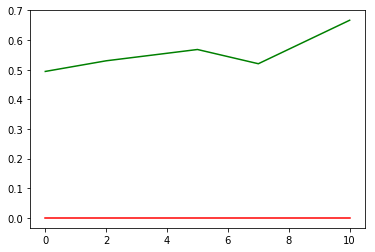

Working on... WFC
31.622776601683793
Window: 0
[[87 41]
 [77 46]]
F1,score 0.43809523809523804
Accuracy: 0.5298804780876494
2.6826957952797255
Window: 2
[[119  18]
 [ 94  20]]
F1,score 0.2631578947368421
Accuracy: 0.5537848605577689
2.6826957952797255
Window: 5
[[114  24]
 [ 93  19]]
F1,score 0.24516129032258066
Accuracy: 0.532
7.196856730011519
Window: 7
[[117  21]
 [ 90  22]]
F1,score 0.2838709677419355
Accuracy: 0.556
7.196856730011519
Window: 10
[[112  21]
 [ 88  28]]
F1,score 0.33939393939393936
Accuracy: 0.5622489959839357
[0, 0, 0, 0, 0]
[0.5298804780876494, 0.5537848605577689, 0.532, 0.556, 0.5622489959839357]
accuracy
accuracy


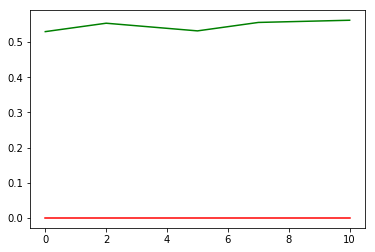

Working on... WMT
10000.0
Window: 0
[[71 42]
 [76 62]]
F1,score 0.5123966942148761
Accuracy: 0.5298804780876494
138.94954943731375
Window: 2
[[ 19  96]
 [ 25 111]]
F1,score 0.6472303206997085
Accuracy: 0.5179282868525896
1.0
Window: 5
[[43 74]
 [61 72]]
F1,score 0.5161290322580645
Accuracy: 0.46
19.306977288832496
Window: 7
[[36 73]
 [63 78]]
F1,score 0.5342465753424657
Accuracy: 0.456
31.622776601683793
Window: 10
[[32 71]
 [60 86]]
F1,score 0.5676567656765676
Accuracy: 0.4738955823293173
[0, 0, 0, 0, 0]
[0.5298804780876494, 0.5179282868525896, 0.46, 0.456, 0.4738955823293173]
accuracy
accuracy


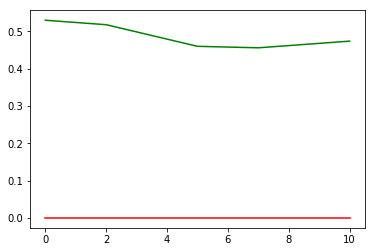

Working on... XOM
84.83428982440716
Window: 0
[[133   5]
 [109   4]]
F1,score 0.06557377049180327
Accuracy: 0.545816733067729
1.637893706954064
Window: 2
[[ 32 105]
 [ 27  87]]
F1,score 0.5686274509803922
Accuracy: 0.47410358565737054
138.94954943731375
Window: 5
[[137  12]
 [ 88  13]]
F1,score 0.20634920634920637
Accuracy: 0.6
0.0001
Window: 7
[[137  14]
 [ 87  12]]
F1,score 0.192
Accuracy: 0.596
372.7593720314938
Window: 10
[[127  26]
 [ 64  32]]
F1,score 0.4155844155844156
Accuracy: 0.6385542168674698
[0, 0, 0, 0, 0]
[0.545816733067729, 0.47410358565737054, 0.6, 0.596, 0.6385542168674698]
accuracy
accuracy


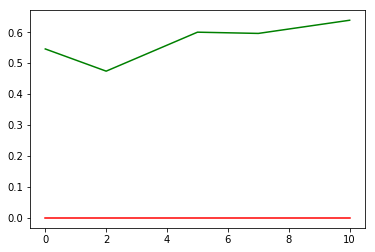

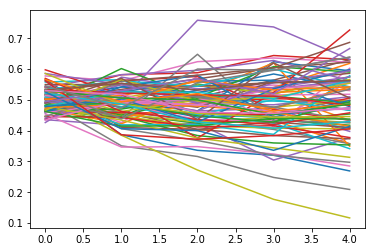

In [47]:
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]

for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',tickers[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[0,2,5,7,10]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['Close']-price.iloc[i+1]['Open'])
            
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            x.append(xtemp[i])
        y=np.array(y)
       
        x=np.array(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
    

        cspace=np.concatenate(((np.logspace(0,3,15)),np.logspace(-4,4,10)))
        gspace=[1]
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.8)
                x_train=x_tv[0:trainpoint]
                y_train=y_tv[0:trainpoint]
                x_val=x_tv[trainpoint:]
                y_val=y_tv[trainpoint:]

                rbf_svm=svm.SVC(C=c)
                x_train,y_train=smote(x_train,y_train)
                rbf_svm.fit(x_train,y_train)

                x_val,y_val=smote(x_val,y_val)
                    
                    
                cvacc=rbf_svm.score(x_val,y_val)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    
                    maxc=c
                    bestsvm=rbf_svm

        #print('ACCURACY on val:',maxacc)
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        print(maxc)
        rbf_svm=svm.SVC(C=maxc)
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        confmatrix=confusion_matrix(y_test, prediction)
        print('Window:',t)
        print(confmatrix)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=rbf_svm.score(x_test,y_test)
        #print('Accuracy on TEST set:',testacc
        
        print('F1,score',CM)
        print('Accuracy:',valueacc)
        f1scoretotal.append(CM)
        f1total.append(totu)
        acctotal.append(valueacc)
        auctotal.append(auc)
    print(f1total)
    print(acctotal)
    print('accuracy')
    print('accuracy')
    f1total=normalize(np.asarray(f1total).reshape(-1,1),axis=0,norm='max')
    plt.plot(trendwindowtime,acctotal,'g')
    plt.plot(trendwindowtime,f1total,'r')
    plt.show()
    f1scoreresults.append(f1scoretotal)
    accstocksresults.append(acctotal)
    f1stocksresults.append(f1total)
    aucresults.append(auctotal)
for p in accstocksresults:
    plt.plot(p)
plt.show()

In [48]:
tempacc=accstocksresults

[0.50291052 0.48947203 0.48484627 0.4843338  0.48956207]


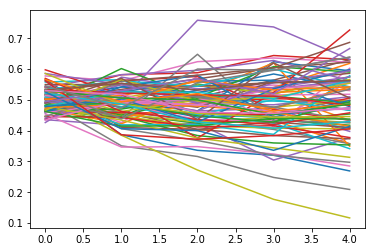

In [49]:
import operator
t=[0,0,0,0,0]
for i in range(0,len(tempacc)):
    #for k in range(0,len(tempacc[i])):
        #print(tempacc[i][k])
     #   if(tempacc[i][k]<0.5):
      #     tempacc[i][k]=1-tempacc[i][k]
    t=np.add(t,tempacc[i])
    plt.plot(tempacc[i])
print(t/len(tempacc))
plt.show()

In [ ]:
for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(C=c)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    #prediction=rbf_svm.predict(x_val)
                    if(sum(y_val)+2<len(x_val) and sum(y_val)>2):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    cvacclist.append(rbf_svm.score(x_val,y_val))
                cvacc=sum(cvacclist)/len(cvacclist)